In [3]:
# Install core Python packages
!pip install numpy==1.26.4 pandas==2.2.3 matplotlib==3.7.1 seaborn==0.12.1

# Install machine learning and deep learning packages
!pip install scikit-learn==1.6.1 torch==2.6.0 torchvision==0.21.0 torchaudio==2.6.0 torchrl==0.6.0 tensordict==0.6.1 tensorboard==2.18.0

# Install reinforcement learning packages
!pip install gym==0.26.2 gymnasium==0.28.1 pygame==2.1.0

# Install visualization packages
!pip install plotly==6.0.0 dash==2.18.2 dash_bootstrap_components==1.7.1 adjustText==1.3.0

# Install utility packages
!pip install av==13.1.0 cloudpickle==3.1.1 filelock==3.17.0 fsspec==2024.12.0 importlib-metadata==8.6.1
!pip install jinja2==3.1.5 markupsafe==3.0.2 mpmath==1.3.0 networkx==3.2.1 orjson==3.10.15
!pip install packaging==24.2 pillow==11.1.0 sympy==1.13.1 typing-extensions==4.12.2 zipp==3.21.0 tqdm==4.65.0 optuna==3.3.0

# Install adjustText
!pip install adjustText==1.3.0

# Verify Python version
!python --version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [1]:
#!/usr/bin/env python
# coding: utf-8

import os
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import time
from typing import Dict, Optional, Any, Tuple
from tensordict import TensorDict
from tensordict.nn import TensorDictModule, TensorDictSequential
from torch.optim import Adam
from torch.utils.tensorboard import SummaryWriter
from torchrl.collectors import SyncDataCollector
from torchrl.data import LazyTensorStorage, ReplayBuffer
from torchrl.data import OneHot, Bounded, Unbounded, Binary, Composite
from torchrl.envs import EnvBase
from torchrl.modules import EGreedyModule, MLP, QValueModule
from torchrl.objectives import DQNLoss, SoftUpdate

# Define the file path
file_path = 'data/organized_dataset.csv'

/usr/local/lib/python3.11/dist-packages/torchrl/data/replay_buffers/samplers.py:37: UserWarning: Failed to import torchrl C++ binaries. Some modules (eg, prioritized replay buffers) may not work with your installation. If you installed TorchRL from PyPI, please report the bug on TorchRL github. If you installed TorchRL locally and/or in development mode, check that you have all the required compiling packages.
  warnings.warn(EXTENSION_WARNING)


In [2]:
def generate_synthetic_data(num_samples=100000):
    """
    Generate synthetic advertising data with realistic correlations and a constrained keyword space.

    Parameters:
    -----------
    num_samples : int, default=100000
        Number of data points to generate in the synthetic dataset.

    Returns:
    --------
    pandas.DataFrame
        Structured dataset with advertising metrics exhibiting biologically-inspired
        correlative properties and constraints.

    Notes:
    ------
    The function implements a Monte Carlo simulation approach with predetermined
    keyword constraints, while preserving stochastic relationships between
    advertising metrics through conditional probability distributions.
    """
    # Define the constrained keyword space based on specification
    predefined_keywords = [
        "Autoversicherung", "Elektronik kaufen", "Fitnessstudio", "Flug buchen",
        "Gartenmöbel", "Günstige Hotels", "Haushaltsgeräte", "Hotel buchen",
        "keyword", "Kreditvergleich", "Laptop kaufen", "Mietwagen",
        "Online Banking", "Online Shopping", "Reifenwechsel", "Reiseversicherung",
        "Smartphone kaufen", "Sparplan", "Steuerberatung", "Streaming Dienste",
        "Urlaub buchen"
    ]

    # Initialize stochastic parameters with controlled random seed for reproducibility
    base_difficulty = np.random.beta(2.5, 3.5, num_samples)

    # Generate primary data structure with controlled keyword sampling
    data = {
        # Sample keywords with replacement to achieve desired dataset size
        "keyword": np.random.choice(predefined_keywords, size=num_samples),
        "competitiveness": np.random.beta(2, 3, num_samples),
        "difficulty_score": np.random.uniform(0, 1, num_samples),
        "organic_rank": np.random.randint(1, 11, num_samples),
        "organic_clicks": np.random.randint(50, 5000, num_samples),
        "organic_ctr": np.random.uniform(0.01, 0.3, num_samples),
        "paid_clicks": np.random.randint(10, 3000, num_samples),
        "paid_ctr": np.random.uniform(0.01, 0.25, num_samples),
        "ad_spend": np.random.uniform(10, 10000, num_samples),
        "ad_conversions": np.random.randint(0, 500, num_samples),
        "ad_roas": np.random.uniform(0.5, 5, num_samples),
        "conversion_rate": np.random.uniform(0.01, 0.3, num_samples),
        "cost_per_click": np.random.uniform(0.1, 10, num_samples),
        "cost_per_acquisition": np.random.uniform(5, 500, num_samples),
        "previous_recommendation": np.random.choice([0, 1], size=num_samples),
        "impression_share": np.random.uniform(0.1, 1.0, num_samples),
        "conversion_value": np.random.uniform(0, 10000, num_samples)
    }

    # Introduce realistic correlations with controlled variance

    # Competitiveness influences difficulty score with stochastic perturbation
    data["difficulty_score"] = 0.7 * data["competitiveness"] + 0.3 * base_difficulty

    # Difficulty score determines organic ranking with Gaussian noise
    data["organic_rank"] = 1 + np.floor(9 * data["difficulty_score"] +
                                        np.random.normal(0, 1, num_samples).clip(-2, 2))
    data["organic_rank"] = data["organic_rank"].clip(1, 10).astype(int)

    # CTR follows beta distribution modulated by reciprocal rank relationship
    base_ctr = np.random.beta(1.5, 10, num_samples)
    rank_effect = (11 - data["organic_rank"]) / 10
    data["organic_ctr"] = (base_ctr * rank_effect * 0.3).clip(0.01, 0.3)

    # Organic clicks derived from log-normal impression distribution and CTR
    base_impressions = np.random.lognormal(8, 1, num_samples).astype(int)
    data["organic_clicks"] = (base_impressions * data["organic_ctr"]).astype(int)

    # Paid CTR correlated with organic CTR plus multiplicative noise
    data["paid_ctr"] = (data["organic_ctr"] *
                        np.random.normal(1, 0.3, num_samples)).clip(0.01, 0.25)

    # Paid clicks from log-normal impression distribution
    paid_impressions = np.random.lognormal(7, 1.2, num_samples).astype(int)
    data["paid_clicks"] = (paid_impressions * data["paid_ctr"]).astype(int)

    # CPC correlates with competitiveness through linear transformation with noise
    data["cost_per_click"] = (0.5 + 9.5 * data["competitiveness"] *
                              np.random.normal(1, 0.2, num_samples)).clip(0.1, 10)

    # Ad spend calculated deterministically from clicks and CPC
    data["ad_spend"] = data["paid_clicks"] * data["cost_per_click"]

    # Conversion rate from beta distribution reflecting e-commerce behavior
    data["conversion_rate"] = np.random.beta(1.2, 15, num_samples).clip(0.01, 0.3)

    # Ad conversions deterministically derived from clicks and conversion rate
    data["ad_conversions"] = (data["paid_clicks"] * data["conversion_rate"]).astype(int)

    # Conversion value with log-normal distribution scaled by conversions
    base_value = np.random.lognormal(4, 1, num_samples)
    data["conversion_value"] = data["ad_conversions"] * base_value

    # Cost per acquisition with proper handling of division edge cases
    with np.errstate(divide='ignore', invalid='ignore'):
        data["cost_per_acquisition"] = np.where(
            data["ad_conversions"] > 0,
            data["ad_spend"] / data["ad_conversions"],
            500  # Default high CPA for no conversions
        ).clip(5, 500)

    # ROAS calculated with proper numerical stability considerations
    with np.errstate(divide='ignore', invalid='ignore'):
        data["ad_roas"] = np.where(
            data["ad_spend"] > 0,
            data["conversion_value"] / data["ad_spend"],
            0
        ).clip(0.5, 5)

    # Impression share inversely correlated with competitiveness
    data["impression_share"] = (1 - 0.6 * data["competitiveness"] *
                               np.random.normal(1, 0.2, num_samples)).clip(0.1, 1.0)

    # Ensure keyword-specific coherence in metrics through post-processing
    df = pd.DataFrame(data)

    # Sort by keyword to ensure sequential organization beneficial for environment
    df_sorted = df.sort_values('keyword').reset_index(drop=True)

    return df_sorted

In [3]:
def split_dataset_by_ratio(dataset, train_ratio=0.8):
    """
    Splits the dataset into training and test sets based on keywords.

    Args:
        dataset (pd.DataFrame): The dataset to split.
        train_ratio (float): Ratio of keywords to include in the training set (0.0-1.0).

    Returns:
        tuple: (training_dataset, test_dataset)
    """
    # Get all unique keywords
    keywords = dataset['keyword'].unique()

    # Split rows into training and test sets
    rows_training = round((len(dataset) * train_ratio) / keywords.size) * keywords.size # Round to the nearest multiple of the number of keywords

    # Create training and test datasets
    train_dataset = dataset.iloc[0:rows_training].reset_index(drop=True)
    test_dataset = dataset.iloc[rows_training:].reset_index(drop=True)

    print(f"Training dataset: {len(train_dataset)} rows, {len(train_dataset['keyword'].unique())} keywords ({int(len(train_dataset) / len(train_dataset['keyword'].unique()))} rows per keyword)")
    print(f"Test dataset: {len(test_dataset)} rows, {len(test_dataset['keyword'].unique())} keywords ({int(len(test_dataset) / len(test_dataset['keyword'].unique()))} rows per keyword)")

    return train_dataset, test_dataset

In [4]:
def get_entry_from_dataset(df, index):
    """
    Retrieves a subset of rows from the DataFrame based on unique keywords.
    This function calculates the number of unique keywords in the DataFrame
    and uses this number to determine the subset of rows to return. The subset
    is determined by the given index and the number of unique keywords.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing the dataset.
        index (int): The index to determine which subset of rows to retrieve.

    Returns:
        pandas.DataFrame: A subset of the DataFrame containing rows corresponding
                      to the specified index and the number of unique keywords.
    """
    # Count unique keywords
    seen_keywords = set()
    if not hasattr(get_entry_from_dataset, "unique_keywords"):
        seen_keywords = set()
        for i, row in df.iterrows():
            keyword = row['keyword']
            if keyword in seen_keywords:
                break
            seen_keywords.add(keyword)
        get_entry_from_dataset.unique_keywords = seen_keywords
        get_entry_from_dataset.keywords_amount = len(seen_keywords)
    else:
        seen_keywords = get_entry_from_dataset.unique_keywords

    # Get the subset of rows based on the index
    keywords_amount = get_entry_from_dataset.keywords_amount
    return df.iloc[index * keywords_amount:index * keywords_amount + keywords_amount].reset_index(drop=True)

In [5]:
# Define a Custom TorchRL Environment
class AdOptimizationEnv(EnvBase):
    """
    AdOptimizationEnv is an environment for optimizing digital advertising strategies using reinforcement learning.

    Attributes:
        initial_cash (float): Initial cash balance for the environment.
        dataset (pd.DataFrame): Dataset containing keyword metrics.
        num_features (int): Number of features for each keyword.
        num_keywords (int): Number of keywords in the dataset.
        action_spec (OneHot): Action specification for the environment.
        reward_spec (Unbounded): Reward specification for the environment.
        observation_spec (Composite): Observation specification for the environment.
        done_spec (Composite): Done specification for the environment.
        current_step (int): Current step in the environment.
        holdings (torch.Tensor): Tensor representing the current holdings of keywords.
        cash (float): Current cash balance.
        obs (TensorDict): Current observation of the environment.

    Methods:
        __init__(self, dataset, initial_cash=100000.0, device="cpu"):
            Initializes the AdOptimizationEnv with the given dataset, initial cash, and device.
        _reset(self, tensordict=None):
            Resets the environment to the initial state and returns the initial observation.
        _step(self, tensordict):
            Takes a step in the environment using the given action and returns the next state, reward, and done flag.
        _compute_reward(self, action, current_pki, action_idx):
            Computes the reward based on the selected keyword's metrics.
        _set_seed(self, seed: Optional[int]):
            Sets the random seed for the environment.
    """

    def __init__(self, dataset, initial_cash=100000.0, device="cpu"):
        """
        Initializes the digital advertising environment.

        Args:
            dataset (Any): The dataset containing keyword features and other relevant data.
            initial_cash (float, optional): The initial amount of cash available for advertising. Defaults to 100000.0.
            device (str, optional): The device to run the environment on, either "cpu" or "cuda". Defaults to "cpu".

        Attributes:
            initial_cash (float): The initial amount of cash available for advertising.
            dataset (Any): The dataset containing keyword features and other relevant data.
            num_features (int): The number of features in the dataset.
            num_keywords (int): The number of keywords in the dataset.
            action_spec (OneHot): The specification for the action space, which includes selecting a keyword to buy or choosing to buy nothing.
            reward_spec (Unbounded): The specification for the reward space, which is unbounded and of type torch.float32.
            observation_spec (Composite): The specification for the observation space, which includes keyword features, cash, holdings, and step count.
            done_spec (Composite): The specification for the done space, which includes flags for done, terminated, and truncated states.
        """
        super().__init__(device=device)
        self.initial_cash = initial_cash
        self.dataset = dataset
        self.num_features = len(feature_columns)
        self.num_keywords = get_entry_from_dataset(self.dataset, 0).shape[0]
        self.action_spec = OneHot(n=self.num_keywords + 1) # select which one to buy or the last one to buy nothing
        self.reward_spec = Unbounded(shape=(1,), dtype=torch.float32)
        self.observation_spec = Composite(
            observation = Composite(
                keyword_features=Unbounded(shape=(self.num_keywords, self.num_features), dtype=torch.float32),
                cash=Unbounded(shape=(1,), dtype=torch.float32),
                holdings=Bounded(low=0, high=1, shape=(self.num_keywords,), dtype=torch.int, domain="discrete")
            ),
            step_count=Unbounded(shape=(1,), dtype=torch.int64)
        )
        self.done_spec = Composite(
            done=Binary(shape=(1,), dtype=torch.bool),
            terminated=Binary(shape=(1,), dtype=torch.bool),
            truncated=Binary(shape=(1,), dtype=torch.bool)
        )

        self.feature_means = torch.tensor(dataset[feature_columns].mean().values, dtype=torch.float32, device=device)
        self.feature_stds = torch.tensor(dataset[feature_columns].std().values, dtype=torch.float32, device=device)
        # Prevent division by zero
        self.feature_stds = torch.where(self.feature_stds > 0, self.feature_stds, torch.ones_like(self.feature_stds))

        # Cash normalization
        self.cash_mean = initial_cash / 2
        self.cash_std = initial_cash / 4

        self.reset()

    def _reset(self, tensordict: TensorDict =None):
        """
        Resets the environment to its initial state.

        Args:
            tensordict (TensorDict, optional): A TensorDict to be updated with the reset state. If None, a new TensorDict is created.

        Returns:
            TensorDict: A TensorDict containing the reset state of the environment, including:
                - "done" (torch.tensor): A boolean tensor indicating if the episode is done.
                - "observation" (TensorDict): A TensorDict containing the initial observation with:
                    - "keyword_features" (torch.tensor): Features of the current keywords.
                    - "cash" (torch.tensor): The initial cash balance.
                    - "holdings" (torch.tensor): The initial holdings state for each keyword.
                - "step_count" (torch.tensor): The current step count, initialized to 0.
                - "terminated" (torch.tensor): A boolean tensor indicating if the episode is terminated.
                - "truncated" (torch.tensor): A boolean tensor indicating if the episode is truncated.
        """
        self.current_step = 0
        self.holdings = torch.zeros(self.num_keywords, dtype=torch.int, device=self.device) # 0 = not holding, 1 = holding keyword
        self.cash = self.initial_cash

        # Create the initial observation.
        keyword_features = torch.tensor(get_entry_from_dataset(self.dataset, self.current_step)[feature_columns].values, dtype=torch.float32, device=self.device)
        keyword_features = (keyword_features - self.feature_means) / self.feature_stds
        cash_normalized = (torch.tensor(self.cash, dtype=torch.float32, device=self.device) - self.cash_mean) / self.cash_std

        obs = TensorDict({
            "keyword_features": keyword_features,  # Current pki for each keyword
            "cash": cash_normalized,  # Current cash balance
            "holdings": self.holdings.clone()  # 1 for each keyword if we are holding
        }, batch_size=[])

        if tensordict is None:
            tensordict = TensorDict({}, batch_size=[])
        else:
            tensordict = tensordict.empty()

        tensordict = tensordict.update({
            "done": torch.tensor(False, dtype=torch.bool, device=self.device),
            "observation": obs,
            "step_count": torch.tensor(self.current_step, dtype=torch.int64, device=self.device),
            "terminated": torch.tensor(False, dtype=torch.bool, device=self.device),
            "truncated": torch.tensor(False, dtype=torch.bool, device=self.device)
        })

        self.obs = obs
        return tensordict


    def _step(self, tensordict: TensorDict):
        """
        Perform a single step in the environment using the provided tensor dictionary.

        Args:
            tensordict (TensorDict): A dictionary containing the current state and action.

        Returns:
            TensorDict: A dictionary containing the next state, reward, and termination status.

        The function performs the following steps:
        1. Extracts the action from the input tensor dictionary.
        2. Determines the index of the selected keyword.
        3. Retrieves the current entry from the dataset based on the current step.
        4. Updates the holdings based on the selected action.
        5. Calculates the reward based on the action taken.
        6. Advances to the next time step and checks for termination conditions.
        7. Retrieves the next keyword features for the subsequent state.
        8. Updates the observation state with the new keyword features, cash balance, and holdings.
        9. Updates the tensor dictionary with the new state, reward, and termination status.
        10. Returns the updated tensor dictionary containing the next state, reward, and termination status.
        """
        # Get the action from the input tensor dictionary.
        action = tensordict["action"]
        true_indices = torch.nonzero(action, as_tuple=True)[0]
        action_idx = true_indices[0] if len(true_indices) > 0 else self.action_spec.n - 1

        current_pki = get_entry_from_dataset(self.dataset, self.current_step)


        # Update cash based on the action
        ad_roas = 0.0
        if action_idx < self.num_keywords:
            # Get the selected keyword's ad spend
            selected_keyword = current_pki.iloc[action_idx.item()]
            ad_cost = selected_keyword["ad_spend"]
            ad_revenue = selected_keyword["conversion_value"]
            ad_roas = selected_keyword["ad_roas"]

            # we assume the marketing budget is 10% of the cash
            if (self.cash * 0.1) >= ad_cost:
                # When enough balance, update cash with ad revenue and deduct ad cost
                self.cash -= ad_cost
                self.cash += ad_revenue

        # Update holdings based on action (only one keyword is selected)
        new_holdings = torch.zeros_like(self.holdings)
        if action_idx < self.num_keywords:
            new_holdings[action_idx] = 1
        self.holdings = new_holdings

        # Calculate the reward based on the action taken.
        reward = self._compute_reward(action, current_pki, action_idx, ad_roas)

         # Move to the next time step.
        self.current_step += 1
        terminated = self.cash < 0 or self.current_step >= (len(self.dataset) // self.num_keywords) - 2 # -2 to avoid going over the last index
        truncated = False

        # Get next pki for the keywords
        next_keyword_features = torch.tensor(get_entry_from_dataset(self.dataset, self.current_step)[feature_columns].values, dtype=torch.float32, device=self.device)
        next_keyword_features = (next_keyword_features - self.feature_means) / self.feature_stds
        cash_normalized = (torch.tensor(self.cash, dtype=torch.float32, device=self.device) - self.cash_mean) / self.cash_std

        next_obs = TensorDict({
            "keyword_features": next_keyword_features,  # next pki for each keyword
            "cash": cash_normalized.clone().detach(),  # Current cash balance
            "holdings": self.holdings.clone()
        }, batch_size=[])

        # Update the state
        self.obs = next_obs
        print(f'Step (_step): {self.current_step}, Action: {action_idx}, Reward: {reward}, Cash: {self.cash}')

        # tensordict is used from EnvBase later on, so we add the current state here
        tensordict["done"] = torch.as_tensor(bool(terminated or truncated), dtype=torch.bool, device=self.device)
        tensordict["observation"] = self.obs
        tensordict["reward"] = torch.tensor(reward, dtype=torch.float32, device=self.device)
        tensordict["step_count"] = torch.tensor(self.current_step-1, dtype=torch.int64, device=self.device)
        tensordict["terminated"] = torch.tensor(bool(terminated), dtype=torch.bool, device=self.device)
        tensordict["truncated"] = torch.tensor(bool(truncated), dtype=torch.bool, device=self.device)
        # next as return value is also used by EnvBase and later added to tensordict by EnvBase
        next = TensorDict({
            "done": torch.tensor(bool(terminated or truncated), dtype=torch.bool, device=self.device),
            "observation": next_obs,
            "reward": torch.tensor(reward, dtype=torch.float32, device=self.device),
            "step_count": torch.tensor(self.current_step, dtype=torch.int64, device=self.device),
            "terminated": torch.tensor(bool(terminated), dtype=torch.bool, device=self.device),
            "truncated": torch.tensor(bool(truncated), dtype=torch.bool, device=self.device)
        }, batch_size=tensordict.batch_size)

        return next

    def _compute_reward(self, action, current_pki, action_idx, ad_roas):
        """Compute reward based on the selected keyword's metrics"""
        adjusted_reward = 0 if action_idx < self.num_keywords else 1 # encourage the agent to buy something​
        if ad_roas > 0: # log(0) is undefined
            adjusted_reward = np.log(ad_roas)  ## Adjust reward based on ad_roas performance, scale it with log
        missing_rewards = []
        # Calculate the ad_roas we did not get because we chose another keyword​
        for i in range(self.num_keywords):
            sample = current_pki.iloc[i]
            if action[i] == False:
                missing_rewards.append(sample["ad_roas"])
        # Adjust reward based on missing rewards to penalize the agent when not selecting keywords with high(er) ROAS
        # clipping reduces the variance of the rewards
        return np.clip(adjusted_reward - np.mean(missing_rewards) * 0.2, -2, 2)

    def _set_seed(self, seed: Optional[int]):
        rng = torch.manual_seed(seed)
        self.rng = rng

In [6]:
class FlattenInputs(nn.Module):
    """
    A custom PyTorch module to flatten and combine keyword features, cash, and holdings into a single tensor.

    Methods
    -------
    forward(keyword_features, cash, holdings)
        Flattens and combines the input tensors into a single tensor.

    Parameters
    ----------
    keyword_features : torch.Tensor
        A tensor containing keyword features with shape [batch, num_keywords, feature_dim] or [num_keywords, feature_dim].
    cash : torch.Tensor
        A tensor containing cash values with shape [batch] or [batch, 1] or a scalar.
    holdings : torch.Tensor
        A tensor containing holdings with shape [batch, num_keywords] or [num_keywords].

    Returns
    -------
    torch.Tensor
        A combined tensor with all inputs flattened and concatenated along the appropriate dimension.
    """
    def forward(self, keyword_features, cash, holdings):
        # Check if we have a batch dimension
        has_batch = keyword_features.dim() > 2

        if has_batch:
            batch_size = keyword_features.shape[0]
            # Flatten keyword features while preserving batch dimension:
            # [batch, num_keywords, feature_dim] -> [batch, num_keywords * feature_dim]
            flattened_features = keyword_features.reshape(batch_size, -1)

            # Ensure cash has correct dimensions [batch, 1]
            if cash.dim() == 1:  # [batch]
                cash = cash.unsqueeze(-1)  # [batch, 1]
            elif cash.dim() == 0:  # scalar
                cash = cash.unsqueeze(0).expand(batch_size, 1)  # [batch, 1]

            # Ensure holdings has correct dimensions [batch, num_keywords]
            if holdings.dim() == 1:  # [num_keywords]
                holdings = holdings.unsqueeze(0).expand(batch_size, -1)  # [batch, num_keywords]

            # Convert holdings to float
            holdings = holdings.float()

            # Combine all inputs along dimension 1
            combined = torch.cat([flattened_features, cash, holdings], dim=1)
        else:
            # No batch dimension - single sample case
            # Flatten keyword features: [num_keywords, feature_dim] -> [num_keywords * feature_dim]
            flattened_features = keyword_features.reshape(-1)

            # Ensure cash has a dimension
            cash = cash.unsqueeze(-1) if cash.dim() == 0 else cash

            # Convert holdings to float
            holdings = holdings.float()

            # Combine all inputs
            combined = torch.cat([flattened_features, cash, holdings], dim=0)

        return combined

In [7]:
class ModelHandler:
    """
    A class to handle saving and loading of models for the digital advertising system.

    This class provides functionality to:
    1. Save models during training based on performance criteria
    2. Load models for inference or continued training
    3. Manage model versioning and metadata
    """

    def __init__(self, save_dir: str = 'saves'):
        """
        Initialize the ModelHandler.

        Args:
            save_dir (str): Directory to save models to and load models from.
        """
        self.save_dir = save_dir
        os.makedirs(save_dir, exist_ok=True)

    def save_model(self,
                  policy: TensorDictSequential,
                  optim: Optional[torch.optim.Optimizer] = None,
                  metadata: Dict[str, Any] = None,
                  filename: Optional[str] = None) -> str:
        """
        Save the model and related data.

        Args:
            policy: The policy model to save
            optim: Optional optimizer to save for continued training
            metadata: Additional information to save with the model
            filename: Custom filename, if None generates a timestamped name

        Returns:
            str: Path to the saved model file
        """
        if metadata is None:
            metadata = {}

        # Create a save dictionary with the policy
        save_dict = {
            'policy_state_dict': policy.state_dict(),
            'metadata': metadata,
            'timestamp': time.time()
        }

        # Add optimizer if provided
        if optim is not None:
            save_dict['optimizer_state_dict'] = optim.state_dict()

        # Generate filename if not provided
        if filename is None:
            timestamp = time.strftime("%Y%m%d-%H%M%S")
            reward = metadata.get('test_reward', 0)
            steps = metadata.get('total_steps', 0)
            filename = f"model_{timestamp}_reward{reward:.2f}_steps{steps}.pt"

        # Ensure file has .pt extension
        if not filename.endswith('.pt'):
            filename += '.pt'

        filepath = os.path.join(self.save_dir, filename)

        # Save the model
        torch.save(save_dict, filepath)
        print(f"Model saved to {filepath}")

        return filepath

    def load_model(self,
                  policy: TensorDictSequential,
                  filepath: str,
                  device: torch.device,
                  optim: Optional[torch.optim.Optimizer] = None,
                  inference_only: bool = False) -> Tuple[TensorDictSequential, Dict[str, Any]]:
        """
        Load a model from a file.

        Args:
            policy: The policy model architecture to load weights into
            filepath: Path to the model file
            device: Device to load the model to
            optim: Optional optimizer to load state into
            inference_only: If True, sets model to eval mode and doesn't load optimizer

        Returns:
            Tuple: (loaded_policy, metadata_dict)
        """
        # Check file exists
        if not os.path.exists(filepath):
            raise FileNotFoundError(f"Model file not found: {filepath}")

        # Load the checkpoint
        checkpoint = torch.load(filepath, map_location=device)

        # Load the policy state dict
        policy.load_state_dict(checkpoint['policy_state_dict'])

        # Set to evaluation mode if inference only
        if inference_only:
            policy.eval()

        # Load optimizer if provided and available in checkpoint
        if optim is not None and not inference_only and 'optimizer_state_dict' in checkpoint:
            optim.load_state_dict(checkpoint['optimizer_state_dict'])

        # Get metadata
        metadata = checkpoint.get('metadata', {})

        print(f"Model loaded from {filepath}")
        if 'test_reward' in metadata:
            print(f"Test reward: {metadata['test_reward']}")
        if 'total_steps' in metadata:
            print(f"Training steps: {metadata['total_steps']}")

        return policy, metadata

    def find_best_model(self) -> Optional[str]:
        """
        Find the best performing model in the save directory.

        Returns:
            str or None: Path to the best model file, or None if no models found
        """
        best_reward = float('-inf')
        best_model_path = None

        for filename in os.listdir(self.save_dir):
            if filename.endswith('.pt'):
                filepath = os.path.join(self.save_dir, filename)
                try:
                    checkpoint = torch.load(filepath, map_location='cpu')
                    metadata = checkpoint.get('metadata', {})
                    reward = metadata.get('test_reward', float('-inf'))

                    if reward > best_reward:
                        best_reward = reward
                        best_model_path = filepath
                except Exception as e:
                    print(f"Error loading {filepath}: {e}")

        if best_model_path:
            print(f"Found best model: {best_model_path} with reward: {best_reward}")
        else:
            print("No valid models found.")

        return best_model_path

In [8]:
def create_policy(env, feature_dim, num_keywords, device):
    """
    Creates a policy network with the standard architecture.

    Args:
        env: Environment containing action_spec
        feature_dim: Dimension of features per keyword
        num_keywords: Number of keywords
        device: Device to create the policy on

    Returns:
        policy: The complete policy model
    """
    action_dim = env.action_spec.shape[-1]
    total_input_dim = feature_dim * num_keywords + 1 + num_keywords  # features per keyword + cash + holdings

    # Create the flattening module
    flatten_module = TensorDictModule(
        FlattenInputs(),
        in_keys=[("observation", "keyword_features"), ("observation", "cash"), ("observation", "holdings")],
        out_keys=["flattened_input"]
    )

    # Create the value network
    value_mlp = MLP(
        in_features=total_input_dim,
        out_features=action_dim,
        num_cells=[256, 256, 128, 64],  # Deeper and wider architecture
        activation_class=nn.ReLU  # ReLU often performs better than Tanh
    )

    value_net = TensorDictModule(value_mlp, in_keys=["flattened_input"], out_keys=["action_value"])

    # Combine into the complete policy
    policy = TensorDictSequential(flatten_module, value_net, QValueModule(spec=env.action_spec))

    return policy.to(device)

In [10]:
def run_inference(model_path, dataset_test, device, feature_columns):
    """
    Run inference using a saved model

    Args:
        model_path: Path to the saved model
        dataset_test: Test dataset
        device: Device to run on
        feature_columns: List of feature column names
    """
    # Create test environment
    test_env = AdOptimizationEnv(dataset_test, device=device)

    # Get dimensions
    feature_dim = len(feature_columns)
    num_keywords = test_env.num_keywords

    # Create a fresh policy with the same architecture
    inference_policy = create_policy(test_env, feature_dim, num_keywords, device)

    # Load the saved model handler
    model_handler = ModelHandler()
    inference_policy, metadata = model_handler.load_model(
        policy=inference_policy,
        filepath=model_path,
        device=device,
        inference_only=True
    )

    # Run inference
    test_td = test_env.reset()
    total_reward = 0.0
    done = False

    while not done:
        with torch.no_grad():
            test_td = inference_policy(test_td)
        test_td = test_env.step(test_td)
        reward = test_td["reward"].item()
        total_reward += reward
        done = test_td["done"].item()

        # print(f"Step (run_inference ): {test_td['step_count'].item()}, Action: {test_td['action'].argmax().item()}, Reward: {reward}")

    print(f"Total inference reward: {total_reward}")
    return total_reward, inference_policy

In [11]:
def learn(params=None, train_data=None, test_data=None):
    """
    Trains an advertisement optimization model using reinforcement learning.

    Parameters:
    -----------
    params : dict, optional
        Dictionary containing hyperparameters for training. If None, default values will be used.
        - lr : float, optional
            Learning rate for the optimizer. Default is 0.001.
        - batch_size : int, optional
            Batch size for training. Default is 128.
        - gamma : float, optional
            Discount factor for future rewards. Default is 0.99.
        - weight_decay : float, optional
            Weight decay (L2 regularization) for the optimizer. Default is 1e-5.
        - eps : float, optional
            Initial value for epsilon in epsilon-greedy exploration. Default is 0.99.
    train_data : DataFrame, optional
        Training dataset. If None, synthetic data will be generated.
    test_data : DataFrame, optional
        Test dataset. If None, synthetic data will be generated.

    Returns:
    --------
    float
        The best test reward achieved during training.

    Notes:
    ------
    - The function initializes the environment, policy, and exploration module.
    - It uses a replay buffer to store experiences and performs training using DQN loss.
    - The model is periodically evaluated on the test dataset.
    - The best model is saved based on test performance.
    - TensorBoard is used for logging training metrics.
    """

    if (train_data is not None) and (test_data is not None):
        # Use the provided training and test data
        dataset_training = train_data
        dataset_test = test_data
    else:
        # Load the organized dataset if the file exists
        if os.path.exists(file_path):
            # If file exists, load it directly
            dataset = pd.read_csv(file_path)
            print(f"Dataset loaded from {file_path}")
        else:
            # If file doesn't exist, generate synthetic data
            print(f"File {file_path} not found. Generating synthetic data...")
            # Create the directory if it doesn't exist
            os.makedirs(os.path.dirname(file_path), exist_ok=True)
            dataset = generate_synthetic_data(1000)
            dataset = pd.read_csv(file_path)
            print(f"Dataset loaded from newly created {file_path}")
        # Split it into training and test data
        dataset_training, dataset_test = split_dataset_by_ratio(dataset, train_ratio=0.8)

    # Initialize Environment
    env = AdOptimizationEnv(dataset_training, device=device)

    # Define data and dimensions
    feature_dim = len(feature_columns)
    num_keywords = env.num_keywords

    # Hyperparameters
    if params is None:
        # Create an empty one, the default values will be used when fetching the hyperparameters
        params = {
        }
    # Extract hyperparameters
    lr = params.get('lr', 0.001) # Learning rate for the optimizer
    batch_size = params.get('batch_size', 128) # Batch size for training
    weight_decay = params.get('weight_decay', 1e-5) # Weight decay for regularization
    exploration_eps_init = params.get('exploration_eps_init', 0.9) # Initial value for epsilon in epsilon-greedy exploration
    exploration_eps_end = params.get('exploration_eps_end', 0.01)   # Final value for epsilon in epsilon-greedy exploration
    softupdate_eps = params.get('softupdate_eps', 0.99)  # Soft update rate for target network

    # Create the main policy for training
    policy = create_policy(env, feature_dim, num_keywords, device)

    # Create the evaluation policy (now using the same architecture)
    policy_eval = create_policy(env, feature_dim, num_keywords, device)

    exploration_module = EGreedyModule(
        env.action_spec, annealing_num_steps=100_000, eps_init=exploration_eps_init, eps_end=exploration_eps_end
    )
    exploration_module = exploration_module.to(device)
    policy_explore = TensorDictSequential(policy, exploration_module).to(device)

    init_rand_steps = 5000
    frames_per_batch = 100
    optim_steps = 10
    collector = SyncDataCollector(
        env,
        policy_explore,
        frames_per_batch=frames_per_batch,
        total_frames=-1,
        init_random_frames=init_rand_steps,
    )
    replay_buffer_size = 100_000
    rb = ReplayBuffer(storage=LazyTensorStorage(replay_buffer_size))

    loss = DQNLoss(value_network=policy, action_space=env.action_spec, delay_value=True).to(device)

    optim = Adam(loss.parameters(), lr=lr, weight_decay=weight_decay)  # Add weight decay for regularization
    updater = SoftUpdate(loss, eps=softupdate_eps)

    total_count = 0
    total_episodes = 0
    t0 = time.time()
    # Evaluation parameters
    evaluation_frequency = 1000  # Run evaluation every 1000 steps
    best_test_reward = float('-inf')
    test_env = AdOptimizationEnv(dataset_test, device=device)  # Create a test environment with the test dataset
    model_handler = ModelHandler(save_dir='saves')

    # Tensorboard vorbereiten
    writer = SummaryWriter()
    # Write the hyperparameters to tensorboard
    writer.add_text("Feature Columns", str(feature_columns))
    writer.add_text("Num Keywords", str(num_keywords))
    writer.add_text("init_rand_steps", str(init_rand_steps))
    writer.add_text("frames_per_batch", str(frames_per_batch))
    writer.add_text("batch_size", str(batch_size))
    writer.add_text("optim_steps", str(optim_steps))
    writer.add_text("lr", str(lr))
    writer.add_text("weight_decay", str(weight_decay))
    writer.add_text("exploration_eps_init", str(exploration_eps_init))
    writer.add_text("exploration_eps_end", str(exploration_eps_end))
    writer.add_text("softupdate_eps", str(softupdate_eps))

    for i, data in enumerate(collector):
        # Write data in replay buffer
        step_count = data["step_count"]

        print(f'data: step_count: {step_count}')
        rb.extend(data.to(device))
        max_length = rb[:]["step_count"].max()
        if len(rb) > init_rand_steps:
            # Optim loop (we do several optim steps per batch collected for efficiency)
            for _ in range(optim_steps):
                sample = rb.sample(batch_size)
                total_count += data.numel()

                # Make sure sample is on the correct device
                sample = sample.to(device)  # Move the sample to the specified device
                loss_vals = loss(sample)
                writer.add_scalar("Loss Value", loss_vals["loss"].item(), total_count)
                loss_vals["loss"].backward()
                optim.step()
                optim.zero_grad()
                # Update exploration factor
                exploration_module.step(data.numel())
                # Update target params
                updater.step()
                if i % 10 == 0:  # Fixed condition (was missing '== 0')
                    print(f"Max num steps: {max_length}, rb length {len(rb)}")

                total_episodes += data["next", "done"].sum()

                # Evaluate on test data periodically
                if total_count % evaluation_frequency == 0:
                    print(f"\n--- Testing model performance after {total_count} training steps ---")
                    # Use policy without exploration for evaluation
                    policy_eval.load_state_dict(policy.state_dict())  # Just use the trained policy without exploration
                    policy_eval.eval()

                    # Reset the test environment
                    test_td = test_env.reset()
                    total_test_reward = 0.0
                    done = False
                    max_test_steps = 100  # Limit test steps to avoid infinite loops
                    test_step = 0

                    # Run the model on test environment until done or max steps reached
                    while not done and test_step < max_test_steps:
                        # Forward pass through policy without exploration
                        with torch.no_grad():
                            # Get Q-values
                            test_td = policy_eval(test_td)

                        # Step in the test environment
                        test_td = test_env.step(test_td)
                        reward = test_td["reward"].item()
                        total_test_reward += reward
                        done = test_td["done"].item()
                        test_step += 1

                    writer.add_scalar("Test performance", total_test_reward, total_count)
                    print(f"Test performance: Total reward = {total_test_reward}, Steps = {test_step}")

                    # Save model if it's the best so far
                    if total_test_reward > best_test_reward:
                        best_test_reward = total_test_reward
                        print(f"New best model! Saving with reward: {best_test_reward}")

                        # Save the model
                        model_handler.save_model(
                            policy=policy,
                            optim=optim,
                            metadata={
                                'total_steps': total_count,
                                'test_reward': best_test_reward,
                                'test_steps': test_step,
                                'num_keywords': num_keywords,
                                'feature_columns': feature_columns
                            },
                            filename=f"best_model.pt"  # Overwrite the same file for best model
                        )
                        print(policy.state_dict())

                    print("--- Testing completed ---\n")

        if total_count > 10_000:
            break

    t1 = time.time()

    print(f"Finished after {total_count} steps, {total_episodes} episodes and in {t1-t0}s.")
    print(f"Best test performance: {best_test_reward}")

    # Run inference with the best model
    best_model_path = model_handler.find_best_model()
    if best_model_path:
        total_reward, _ = run_inference(best_model_path, dataset_test, device, feature_columns)
        return total_reward
    else:
        return best_test_reward

# Some global variables
# Select the best device for our machine
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)
print("Device used: ", device)

# Define the feature columns
feature_columns = ["competitiveness", "difficulty_score", "organic_rank", "organic_clicks", "organic_ctr", "paid_clicks", "paid_ctr", "ad_spend", "ad_conversions", "ad_roas", "conversion_rate", "cost_per_click"]

Device used:  cpu


In [12]:
if __name__ == "__main__":
    # Check if the dataset file exists before running learn()
    if not os.path.exists(file_path):
        print(f"Dataset file {file_path} not found. Creating directory and generating synthetic data...")
        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        # Generate synthetic data
        synthetic_data = pd.DataFrame()

        for i in range(5000):
            synthetic_data = pd.concat([synthetic_data, generate_synthetic_data(20)], ignore_index=True)

        # Save the generated data to CSV
        synthetic_data.to_csv(file_path, index=False)
        print(f"Synthetic data generated and saved to {file_path}")

    # Now run the learning process
    learn()

Dataset file data/organized_dataset.csv not found. Creating directory and generating synthetic data...
Synthetic data generated and saved to data/organized_dataset.csv
Dataset loaded from data/organized_dataset.csv
Training dataset: 80010 rows, 21 keywords (3810 rows per keyword)
Test dataset: 19990 rows, 21 keywords (951 rows per keyword)
Step (_step): 1, Action: 0, Reward: -0.7931471805599453, Cash: 99883.01743386194
Step (_step): 2, Action: 3, Reward: 0.6320327226779203, Cash: 99883.01743386194
Step (_step): 3, Action: 1, Reward: -0.19631433966747125, Cash: 99876.24484855498
Step (_step): 4, Action: 2, Reward: -0.32156857942276557, Cash: 99879.33109495827
Step (_step): 5, Action: 0, Reward: -0.8331714023059518, Cash: 99676.8900967388
Step (_step): 6, Action: 0, Reward: 1.374651464512493, Cash: 113400.81187111125
Step (_step): 7, Action: 3, Reward: 0.9, Cash: 113400.81187111125
Step (_step): 8, Action: 0, Reward: -1.2431471805599452, Cash: 113384.32316170892
Step (_step): 9, Action: 

/usr/local/lib/python3.11/dist-packages/tensordict/_td.py:2451: UserWarning: An output with one or more elements was resized since it had shape [100, 1], which does not match the required output shape [100]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /pytorch/aten/src/ATen/native/Resize.cpp:30.)
  new_dest = torch.stack(


Streaming output truncated to the last 5000 lines.
Step (_step): 1663, Action: 3, Reward: 0.882816743092115, Cash: 1038284.8644753982
Step (_step): 1664, Action: 3, Reward: 0.9, Cash: 1038284.8644753982
Step (_step): 1665, Action: 2, Reward: 1.462042105146951, Cash: 1039574.1819230306
Step (_step): 1666, Action: 3, Reward: 0.8077583280296305, Cash: 1039574.1819230306
Step (_step): 1667, Action: 1, Reward: 1.1926617584510877, Cash: 1040904.7094000734
Step (_step): 1668, Action: 3, Reward: 0.8987946804224541, Cash: 1040904.7094000734
Step (_step): 1669, Action: 3, Reward: 0.9, Cash: 1040904.7094000734
Step (_step): 1670, Action: 3, Reward: 0.8640939362827773, Cash: 1040904.7094000734
Step (_step): 1671, Action: 3, Reward: 0.6994353169699321, Cash: 1040904.7094000734
Step (_step): 1672, Action: 3, Reward: 0.8594581117387822, Cash: 1040904.7094000734
Step (_step): 1673, Action: 3, Reward: 0.8825882352251577, Cash: 1040904.7094000734
Step (_step): 1674, Action: 2, Reward: 1.5094379124341002

In [13]:
# Import necessary libraries for visualization
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from adjustText import adjust_text
import torch
from pathlib import Path
import re

In [14]:
# Create output directory for visualizations
output_dir = "visualization_results"
os.makedirs(output_dir, exist_ok=True)
for subdir in ["exploration_strategy", "reward_function", "experience_replay",
               "budget_strategy", "feature_analysis", "keyword_investment"]:
    os.makedirs(os.path.join(output_dir, subdir), exist_ok=True)

In [15]:
# Configure matplotlib to prevent buffer overflows
def configure_matplotlib_constraints():
    """Configure matplotlib rendering pipeline with dimensional constraints"""
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['agg.path.chunksize'] = 10000
    plt.rcParams['savefig.dpi'] = 100  # Lower DPI for saved figures

# Apply constraints immediately
configure_matplotlib_constraints()

In [16]:
# Load or generate dataset
file_path = 'data/organized_dataset.csv'
if os.path.exists(file_path):
    dataset = pd.read_csv(file_path)
    print(f"Dataset loaded from {file_path}")
else:
    print(f"File {file_path} not found. Generating synthetic data...")
    os.makedirs(os.path.dirname(file_path), exist_ok=True)

    # Use the generate_synthetic_data function from the original code
    dataset = generate_synthetic_data(1000)
    dataset.to_csv(file_path, index=False)
    print(f"Synthetic dataset saved to {file_path}")

# Define feature columns (same as in the original code)
feature_columns = ["competitiveness", "difficulty_score", "organic_rank", "organic_clicks",
                  "organic_ctr", "paid_clicks", "paid_ctr", "ad_spend", "ad_conversions",
                  "ad_roas", "conversion_rate", "cost_per_click"]

print(f"Dataset shape: {dataset.shape}")
dataset.head()

Dataset loaded from data/organized_dataset.csv
Dataset shape: (100000, 17)


,keyword,competitiveness,difficulty_score,organic_rank,organic_clicks,organic_ctr,paid_clicks,paid_ctr,ad_spend,ad_conversions,ad_roas,conversion_rate,cost_per_click,cost_per_acquisition,previous_recommendation,impression_share,conversion_value
0,Autoversicherung,0.683167,0.536706,6,481,0.017463,14,0.016654,116.982566,0,0.500000,0.017046,8.355898,500.000000,1,0.656321,0.000000
1,Elektronik kaufen,0.717536,0.631751,8,32,0.021485,11,0.021693,100.628434,2,0.500000,0.195617,9.148039,50.314217,1,0.558266,39.873909
2,Fitnessstudio,0.564847,0.608423,8,11,0.010000,13,0.017174,74.570164,0,0.500000,0.076310,5.736166,500.000000,1,0.658355,0.000000
3,Fitnessstudio,0.247411,0.208589,2,114,0.062129,251,0.076961,527.861529,15,3.767992,0.062661,2.103034,35.190769,0,0.836299,1988.977969
4,Haushaltsgeräte,0.182036,0.247500,4,105,0.053222,28,0.038457,51.338650,1,0.500000,0.038882,1.833523,51.338650,0,0.909308,25.284569


Generating epsilon-greedy exploration visualization...


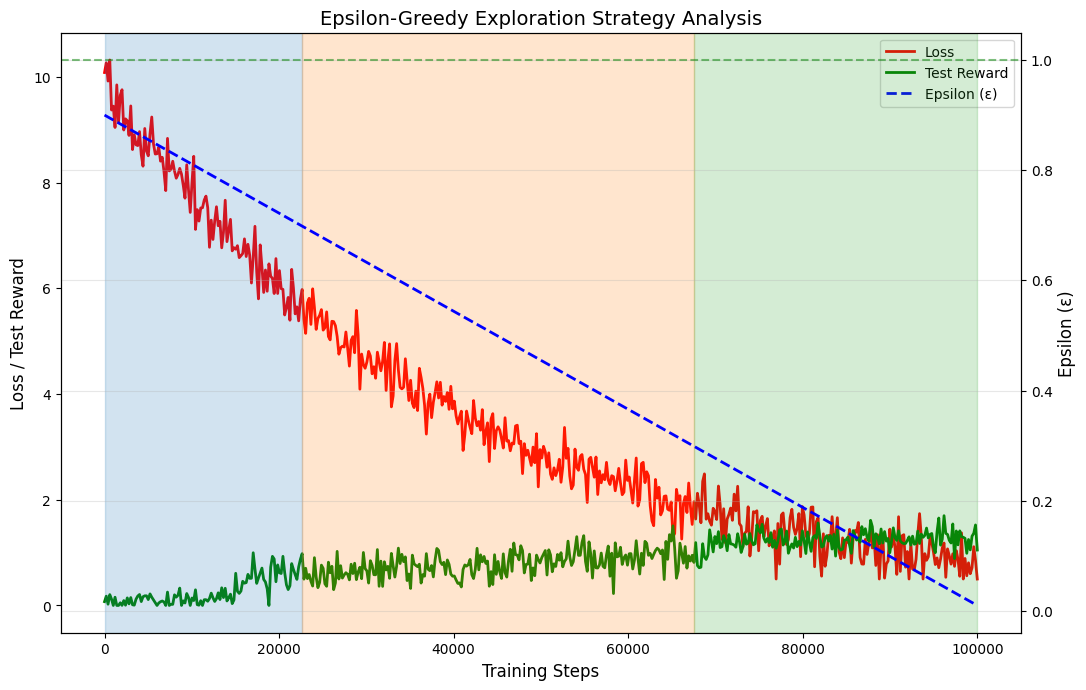

Epsilon-greedy exploration plot saved to visualization_results/exploration_strategy/epsilon_greedy_exploration.png


In [17]:
# 1. Visualize Epsilon-Greedy Exploration Strategy
def visualize_epsilon_greedy_exploration(output_dir):
    """
    Create visualizations focusing on epsilon-greedy exploration strategy.
    """
    print(f"Generating epsilon-greedy exploration visualization...")
    saved_plots = []

    # Generate synthetic training data for epsilon-greedy visualization
    steps = np.linspace(0, 100000, 500)
    epsilon_values = 0.9 - 0.89 * (steps / 100000)

    # Create synthetic reward curve that improves with training
    rewards = []
    for step in steps:
        if step < 15000:
            # Initially low rewards during high exploration
            reward = max(0, np.random.normal(0.05, 0.1) + step/150000)
        elif step < 70000:
            # Increasing rewards during balanced exploration/exploitation
            reward = max(0, np.random.normal(0.5, 0.2) + (step-15000)/110000)
        else:
            # Higher, more stable rewards during exploitation
            reward = max(0, np.random.normal(1.2, 0.15) + (step-70000)/300000)
        rewards.append(reward)

    # Generate synthetic loss values that decrease with training
    losses = 10 * np.exp(-steps / 40000) + np.random.normal(0, 0.3, size=len(steps))
    losses = np.maximum(losses, 0.5)  # Ensure positive losses

    # Create a DataFrame with synthetic data
    synth_data = pd.DataFrame({
        'step': steps,
        'epsilon': epsilon_values,
        'test_reward': rewards,
        'loss': losses
    })

    # Define exploration phases
    def get_phase(epsilon):
        if epsilon > 0.7:
            return "High Exploration"
        elif epsilon > 0.3:
            return "Balanced Exploration/Exploitation"
        else:
            return "High Exploitation"

    synth_data['phase'] = synth_data['epsilon'].apply(get_phase)

    # Create figure with constrained dimensions
    plt.figure(figsize=(12, 8), dpi=100)

    # Define color scheme
    phase_colors = {
        "High Exploration": "#1f77b4",  # Blue
        "Balanced Exploration/Exploitation": "#ff7f0e",  # Orange
        "High Exploitation": "#2ca02c"  # Green
    }

    # Create twin axes for different metrics
    ax1 = plt.gca()
    ax2 = ax1.twinx()

    # Plot loss and reward
    loss_line, = ax1.plot(synth_data['step'], synth_data['loss'], 'r-', linewidth=2, label='Loss')
    reward_line, = ax1.plot(synth_data['step'], synth_data['test_reward'], 'g-', linewidth=2, label='Test Reward')

    # Plot epsilon
    epsilon_line, = ax2.plot(synth_data['step'], synth_data['epsilon'], 'b--', linewidth=2, label='Epsilon (ε)')

    # Highlight phases with background colors
    prev_phase = None
    phase_starts = []
    phase_ends = []
    current_phases = []

    for i, row in synth_data.iterrows():
        if row['phase'] != prev_phase:
            if prev_phase is not None:
                phase_ends.append(row['step'])
            phase_starts.append(row['step'])
            current_phases.append(row['phase'])
            prev_phase = row['phase']

    # Add the last phase end
    if synth_data.shape[0] > 0:
        phase_ends.append(synth_data['step'].iloc[-1])

    # Plot phase backgrounds
    for i, phase in enumerate(current_phases):
        if i < len(phase_starts) and i < len(phase_ends):
            plt.axvspan(phase_starts[i], phase_ends[i], alpha=0.2, color=phase_colors.get(phase, 'gray'))

    # Add phase legend
    phase_patches = [plt.Rectangle((0,0), 1, 1, color=phase_colors.get(phase, 'gray'), alpha=0.2)
                    for phase in phase_colors.keys()]
    ax1.legend(phase_patches, phase_colors.keys(), loc='upper center',
              title="Training Phases", bbox_to_anchor=(0.5, 1.05), ncol=3)

    # Add reference lines
    plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.5, label='Breakeven Reward')

    # Configure axes
    ax1.set_xlabel('Training Steps', fontsize=12)
    ax1.set_ylabel('Loss / Test Reward', fontsize=12)
    ax2.set_ylabel('Epsilon (ε)', fontsize=12)

    # Create combined legend for metrics
    lines = [loss_line, reward_line, epsilon_line]
    labels = [line.get_label() for line in lines]
    ax1.legend(lines, labels, loc='upper right')

    plt.title('Epsilon-Greedy Exploration Strategy Analysis', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Use subplots_adjust instead of tight_layout to prevent overflow
    plt.subplots_adjust(top=0.85, bottom=0.1, left=0.1, right=0.9)

    # Save the plot with constrained DPI
    epsilon_plot_path = os.path.join(output_dir, "epsilon_greedy_exploration.png")
    plt.savefig(epsilon_plot_path, dpi=100, bbox_inches="tight")

    # Display the plot in the notebook
    plt.show()

    saved_plots.append(epsilon_plot_path)
    print(f"Epsilon-greedy exploration plot saved to {epsilon_plot_path}")

    return saved_plots

# Run the function
exploration_plots = visualize_epsilon_greedy_exploration(os.path.join(output_dir, "exploration_strategy"))

Generating reward function visualization...


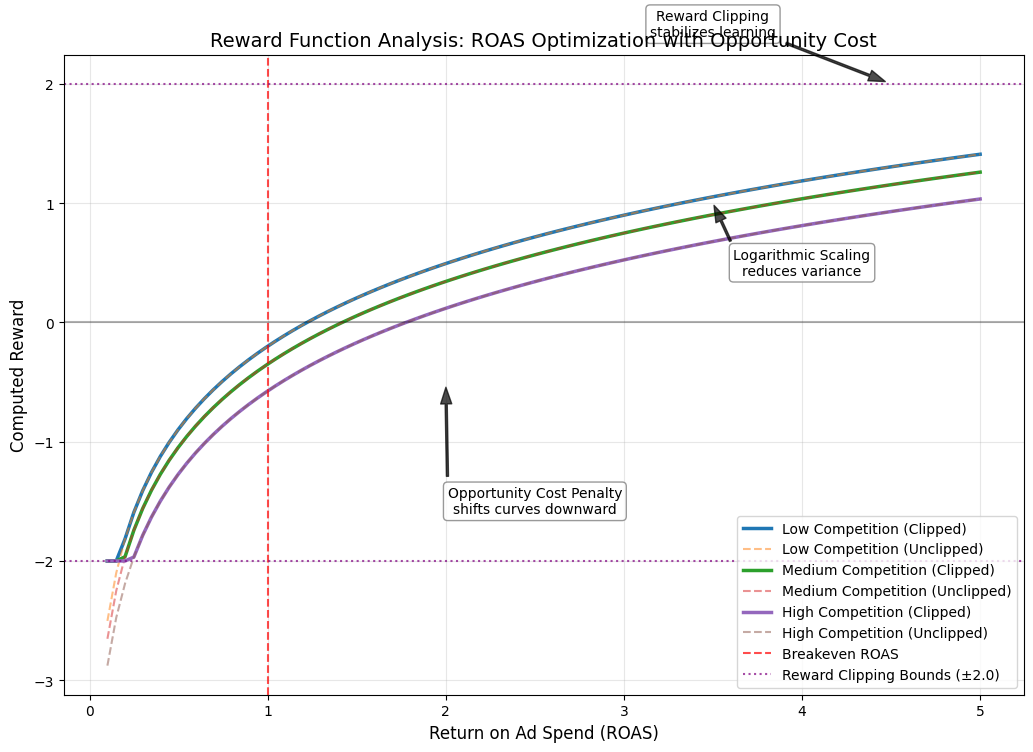

Reward function analysis plot saved to visualization_results/reward_function/reward_function_analysis.png


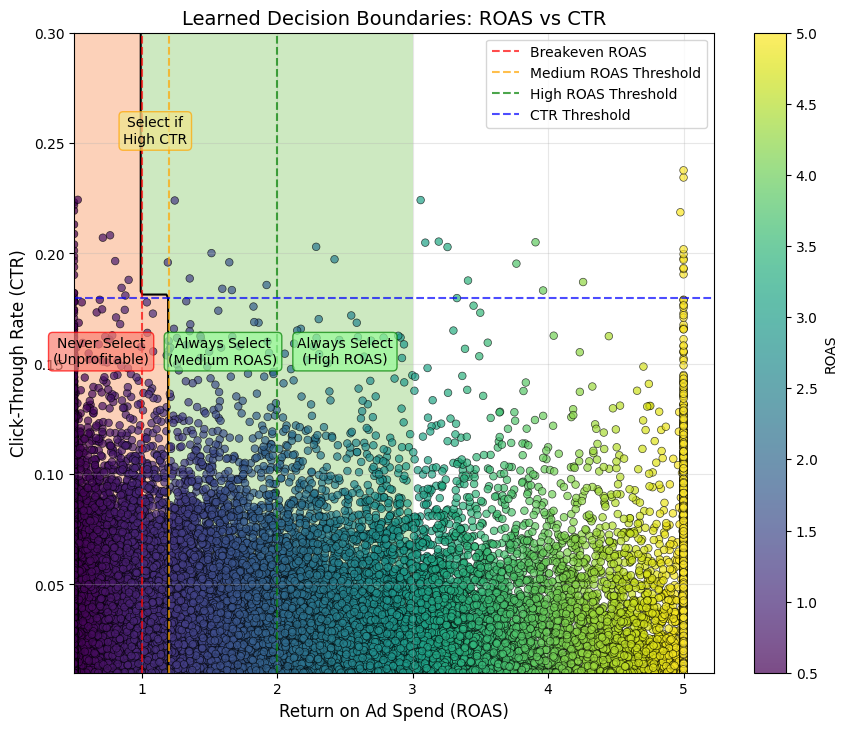

Decision boundaries plot saved to visualization_results/reward_function/decision_boundaries.png


In [18]:
# 2. Visualize Reward Function
def visualize_reward_function(dataset, output_dir):
    """
    Create visualizations focused on the reward function design.
    """
    print(f"Generating reward function visualization...")
    saved_plots = []

    # Define the reward function
    def compute_reward(roas, other_roas, clipping=True):
        # Logarithmic scaling of ROAS
        adjusted_reward = 0 if roas <= 0 else np.log(roas)

        # Opportunity cost penalty
        opportunity_penalty = np.mean(other_roas) * 0.2

        # Compute reward
        reward = adjusted_reward - opportunity_penalty

        # Apply clipping if requested
        if clipping:
            reward = np.clip(reward, -2.0, 2.0)

        return reward

    # Generate a range of ROAS values to visualize
    roas_range = np.linspace(0.1, 5.0, 100)

    # Define different opportunity cost scenarios
    opportunity_scenarios = [
        ("Low Competition", [0.8, 1.0, 1.2, 1.0]),
        ("Medium Competition", [1.5, 1.8, 2.0, 1.7]),
        ("High Competition", [2.5, 3.0, 3.2, 2.8])
    ]

    # Create figure for reward function
    plt.figure(figsize=(12, 8), dpi=100)

    # Plot reward curves for different opportunity costs
    for scenario_name, other_roas in opportunity_scenarios:
        # Calculate rewards with clipping
        rewards_clipped = [compute_reward(roas, other_roas, clipping=True) for roas in roas_range]

        # Calculate rewards without clipping
        rewards_unclipped = [compute_reward(roas, other_roas, clipping=False) for roas in roas_range]

        # Plot clipped reward
        plt.plot(roas_range, rewards_clipped, '-', linewidth=2.5, label=f"{scenario_name} (Clipped)")

        # Plot unclipped reward as lighter dashed line
        plt.plot(roas_range, rewards_unclipped, '--', alpha=0.5,
                 label=f"{scenario_name} (Unclipped)")

    # Add reference lines
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Breakeven ROAS')

    # Add clipping bounds
    plt.axhline(y=2.0, color='purple', linestyle=':', alpha=0.7, label='Reward Clipping Bounds (±2.0)')
    plt.axhline(y=-2.0, color='purple', linestyle=':', alpha=0.7)

    # Configure axes
    plt.xlabel('Return on Ad Spend (ROAS)', fontsize=12)
    plt.ylabel('Computed Reward', fontsize=12)
    plt.title('Reward Function Analysis: ROAS Optimization with Opportunity Cost', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='best')

    # Add annotations explaining reward components
    plt.annotate('Logarithmic Scaling\nreduces variance',
                 xy=(3.5, 1.0), xytext=(4.0, 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                 fontsize=10, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.annotate('Opportunity Cost Penalty\nshifts curves downward',
                 xy=(2.0, -0.5), xytext=(2.5, -1.5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                 fontsize=10, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.annotate('Reward Clipping\nstabilizes learning',
                 xy=(4.5, 2.0), xytext=(3.5, 2.5),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                 fontsize=10, ha='center', va='center',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    # Use subplots_adjust
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

    # Save the plot
    reward_plot_path = os.path.join(output_dir, "reward_function_analysis.png")
    plt.savefig(reward_plot_path, dpi=100, bbox_inches="tight")
    plt.show()

    saved_plots.append(reward_plot_path)
    print(f"Reward function analysis plot saved to {reward_plot_path}")

    # Create decision boundary plot with constrained dimensions
    plt.figure(figsize=(10, 8), dpi=100)

    # Create mesh grid for decision boundary visualization
    roas_grid = np.linspace(0.5, 3.0, 100)
    ctr_grid = np.linspace(0.01, 0.3, 100)
    roas_mesh, ctr_mesh = np.meshgrid(roas_grid, ctr_grid)

    # Define decision function (simplified version of what the RL agent learns)
    def decision_function(roas, ctr):
        if roas > 2.0:
            return 1.0  # Always select high ROAS
        elif roas > 1.2:
            return 1.0  # Select medium ROAS
        elif roas > 1.0 and ctr > 0.18:
            return 1.0  # Select marginal ROAS only with high CTR
        else:
            return 0.0  # Don't select unprofitable keywords

    # Apply decision function to mesh grid
    decision = np.vectorize(decision_function)(roas_mesh, ctr_mesh)

    # Plot decision boundary
    plt.contourf(roas_mesh, ctr_mesh, decision, alpha=0.4, cmap='RdYlGn', levels=[-0.5, 0.5, 1.5])

    # Plot contour lines
    plt.contour(roas_mesh, ctr_mesh, decision, colors='black', linestyles='-', levels=[0.5])

    # Add reference lines
    plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Breakeven ROAS')
    plt.axvline(x=1.2, color='orange', linestyle='--', alpha=0.7, label='Medium ROAS Threshold')
    plt.axvline(x=2.0, color='green', linestyle='--', alpha=0.7, label='High ROAS Threshold')
    plt.axhline(y=0.18, color='blue', linestyle='--', alpha=0.7, label='CTR Threshold')

    # Scatter actual data points
    scatter = plt.scatter(dataset['ad_roas'], dataset['paid_ctr'],
                         c=dataset['ad_roas'], cmap='viridis',
                         alpha=0.7, s=30, edgecolor='k', linewidth=0.5)

    # Add colorbar and legend
    cbar = plt.colorbar(scatter, label='ROAS')
    plt.legend(loc='upper right')

    # Add region labels
    plt.text(2.5, 0.15, "Always Select\n(High ROAS)", ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="palegreen", ec="green", alpha=0.7))

    plt.text(1.6, 0.15, "Always Select\n(Medium ROAS)", ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="palegreen", ec="green", alpha=0.7))

    plt.text(1.1, 0.25, "Select if\nHigh CTR", ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="khaki", ec="orange", alpha=0.7))

    plt.text(0.7, 0.15, "Never Select\n(Unprofitable)", ha='center', fontsize=10,
             bbox=dict(boxstyle="round,pad=0.3", fc="salmon", ec="red", alpha=0.7))

    # Configure axes
    plt.xlabel('Return on Ad Spend (ROAS)', fontsize=12)
    plt.ylabel('Click-Through Rate (CTR)', fontsize=12)
    plt.title('Learned Decision Boundaries: ROAS vs CTR', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Use subplots_adjust
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

    # Save the plot
    decision_plot_path = os.path.join(output_dir, "decision_boundaries.png")
    plt.savefig(decision_plot_path, dpi=100, bbox_inches="tight")
    plt.show()

    saved_plots.append(decision_plot_path)
    print(f"Decision boundaries plot saved to {decision_plot_path}")

    return saved_plots

# Run the function
reward_plots = visualize_reward_function(dataset, os.path.join(output_dir, "reward_function"))

Generating experience replay and target network visualization...


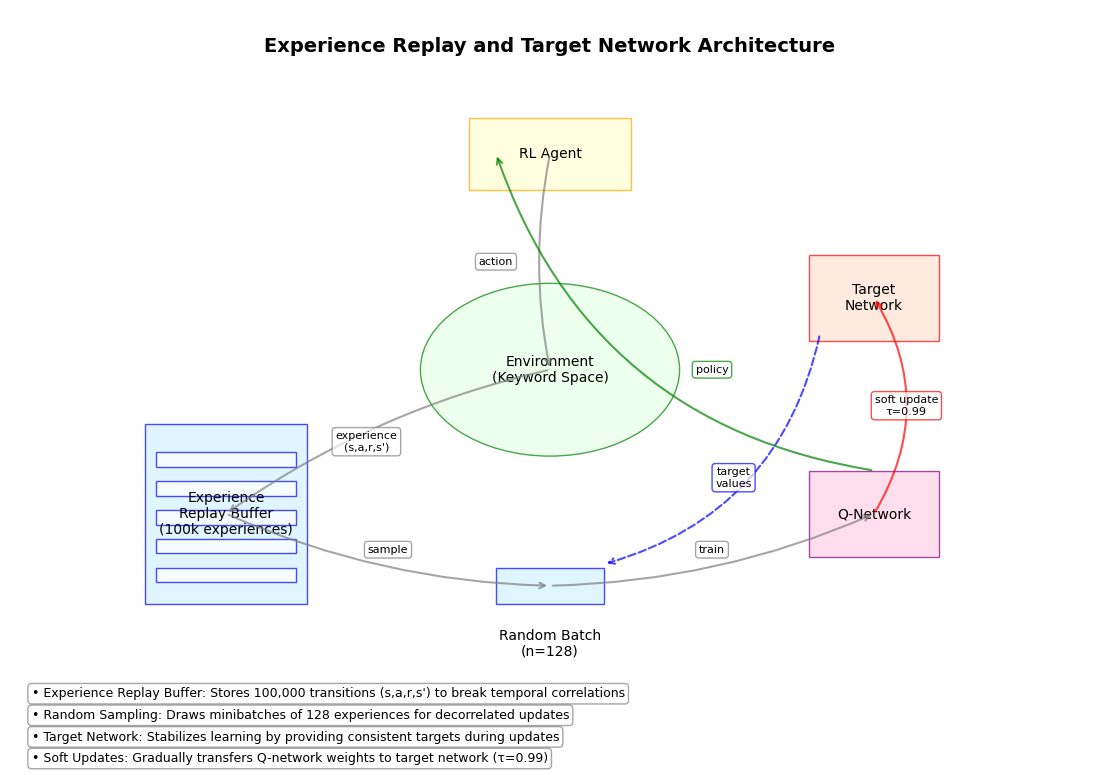

Experience replay and target network plot saved to visualization_results/experience_replay/experience_replay_target_network.png


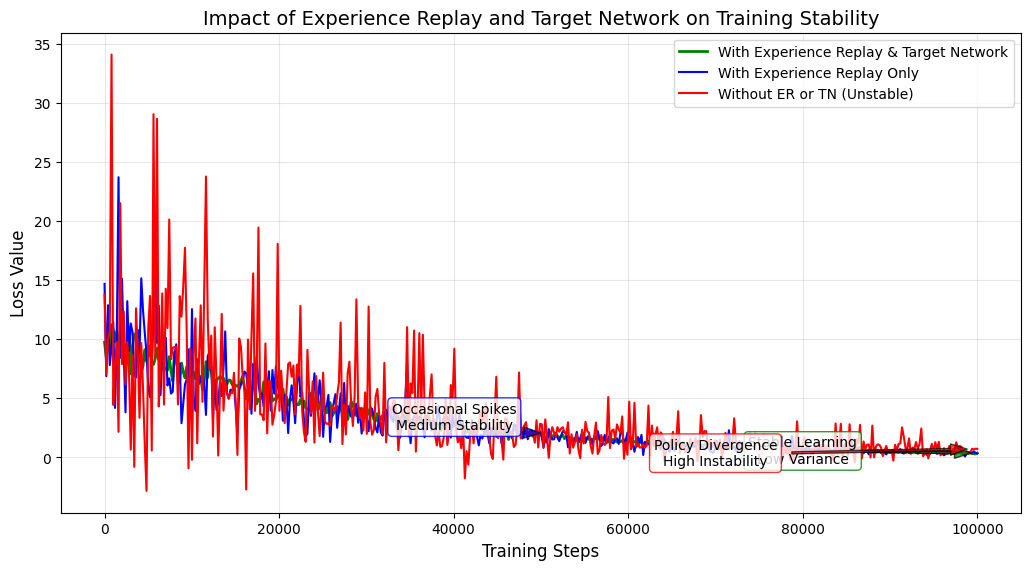

Training stability analysis plot saved to visualization_results/experience_replay/training_stability_analysis.png


In [20]:
# 3. Visualize Experience Replay and Target Network (continued)
def visualize_experience_replay_target_network(output_dir):
    """
    Create visualizations focused on experience replay and target network effects.
    """
    print(f"Generating experience replay and target network visualization...")
    saved_plots = []

    # Create conceptual diagram of experience replay and target network
    plt.figure(figsize=(12, 8), dpi=100)
    ax = plt.gca()
    ax.axis('off')

    # Define component positions
    components = {
        'agent': (0.5, 0.8),
        'environment': (0.5, 0.5),
        'replay_buffer': (0.2, 0.3),
        'batch': (0.5, 0.2),
        'target_network': (0.8, 0.6),
        'value_network': (0.8, 0.3)
    }

    # Draw components
    for name, (x, y) in components.items():
        if name == 'replay_buffer':
            # Buffer with storage capacity representation
            buffer_width = 0.15
            buffer_height = 0.25
            rect = plt.Rectangle((x - buffer_width/2, y - buffer_height/2),
                                buffer_width, buffer_height,
                                fc='#d2f1ff', ec='blue', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x, y, 'Experience\nReplay Buffer\n(100k experiences)',
                    ha='center', va='center', fontsize=10)

            # Add memory traces
            for i in range(5):
                small_rect = plt.Rectangle((x - buffer_width/2 + 0.01,
                                          y - buffer_height/2 + 0.03 + i*0.04),
                                          buffer_width - 0.02, 0.02,
                                          fc='white', ec='blue', alpha=0.7)
                ax.add_patch(small_rect)

        elif name == 'environment':
            # Environment representation
            circle = plt.Circle((x, y), 0.12, fc='#e6ffe6', ec='green', alpha=0.7)
            ax.add_patch(circle)
            ax.text(x, y, 'Environment\n(Keyword Space)', ha='center', va='center', fontsize=10)

        elif name == 'agent':
            # Agent architecture
            agent_width = 0.15
            agent_height = 0.1
            rect = plt.Rectangle((x - agent_width/2, y - agent_height/2),
                                agent_width, agent_height,
                                fc='#ffffd2', ec='orange', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x, y, 'RL Agent', ha='center', va='center', fontsize=10)

        elif name == 'batch':
            # Minibatch sampling domain
            batch_width = 0.1
            batch_height = 0.05
            rect = plt.Rectangle((x - batch_width/2, y - batch_height/2),
                                batch_width, batch_height,
                                fc='#d2f1ff', ec='blue', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x, y - 0.08, 'Random Batch\n(n=128)', ha='center', va='center', fontsize=10)

        elif name == 'value_network':
            # Value function approximator
            nn_width = 0.12
            nn_height = 0.12
            rect = plt.Rectangle((x - nn_width/2, y - nn_height/2),
                                nn_width, nn_height,
                                fc='#ffd2e6', ec='purple', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x, y, 'Q-Network', ha='center', va='center', fontsize=10)

        elif name == 'target_network':
            # Target network
            nn_width = 0.12
            nn_height = 0.12
            rect = plt.Rectangle((x - nn_width/2, y - nn_height/2),
                                nn_width, nn_height,
                                fc='#ffe2d2', ec='red', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x, y, 'Target\nNetwork', ha='center', va='center', fontsize=10)

    # Draw arrows and connections
    arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=0.1',
                     color='gray', lw=1.5, alpha=0.7)

    # Action emission pathway
    ax.annotate('',
                xy=components['environment'],
                xytext=components['agent'],
                arrowprops=arrow_props)
    ax.text(0.45, 0.65, 'action', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))

    # Experience acquisition pathway
    ax.annotate('',
                xy=components['replay_buffer'],
                xytext=components['environment'],
                arrowprops=arrow_props)
    ax.text(0.33, 0.4, 'experience\n(s,a,r,s\')', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))

    # Random sampling pathway
    ax.annotate('',
                xy=components['batch'],
                xytext=components['replay_buffer'],
                arrowprops=arrow_props)
    ax.text(0.35, 0.25, 'sample', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))

    # Gradient update pathway
    ax.annotate('',
                xy=components['value_network'],
                xytext=components['batch'],
                arrowprops=arrow_props)
    ax.text(0.65, 0.25, 'train', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))

    # Soft update pathway
    ax.annotate('',
                xy=components['target_network'],
                xytext=components['value_network'],
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                              color='red', lw=1.5, alpha=0.7))
    ax.text(0.83, 0.45, 'soft update\nτ=0.99', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="red", alpha=0.7))

    # Target value feedback pathway
    ax.annotate('',
                xy=(components['batch'][0] + 0.05, components['batch'][1] + 0.03),
                xytext=(components['target_network'][0] - 0.05, components['target_network'][1] - 0.05),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                              color='blue', lw=1.5, alpha=0.7, linestyle='--'))
    ax.text(0.67, 0.35, 'target\nvalues', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="blue", alpha=0.7))

    # Policy emergence pathway
    ax.annotate('',
                xy=(components['agent'][0] - 0.05, components['agent'][1]),
                xytext=(components['value_network'][0], components['value_network'][1] + 0.06),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.3',
                              color='green', lw=1.5, alpha=0.7))
    ax.text(0.65, 0.5, 'policy', ha='center', va='center', fontsize=8,
            bbox=dict(boxstyle="round", fc="white", ec="green", alpha=0.7))

    # Title
    ax.text(0.5, 0.95, 'Experience Replay and Target Network Architecture',
            ha='center', va='center', fontsize=14, fontweight='bold')

    # Explanatory notes
    notes = [
        "• Experience Replay Buffer: Stores 100,000 transitions (s,a,r,s') to break temporal correlations",
        "• Random Sampling: Draws minibatches of 128 experiences for decorrelated updates",
        "• Target Network: Stabilizes learning by providing consistent targets during updates",
        "• Soft Updates: Gradually transfers Q-network weights to target network (τ=0.99)"
    ]

    for i, note in enumerate(notes):
        ax.text(0.02, 0.05 - i*0.03, note, ha='left', va='center', fontsize=9,
                bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.7))

    plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

    # Save the plot
    er_tn_plot_path = os.path.join(output_dir, "experience_replay_target_network.png")
    plt.savefig(er_tn_plot_path, dpi=100)
    plt.show()

    saved_plots.append(er_tn_plot_path)
    print(f"Experience replay and target network plot saved to {er_tn_plot_path}")

    # Generate stability analysis visualization
    plt.figure(figsize=(12, 6), dpi=100)

    # Generate synthetic training trajectories
    steps = np.linspace(0, 100000, 500)

    # Optimal configuration with dual stabilizing mechanisms
    base_loss = 10 * np.exp(-steps / 30000)
    stable_noise = np.random.normal(0, 0.1, size=len(steps))
    smooth_loss = base_loss + stable_noise * base_loss

    # Intermediate stability with single mechanism
    medium_noise = np.random.normal(0, 0.3, size=len(steps))
    # Add stochastic perturbations
    for i in range(10):
        spike_idx = np.random.randint(0, len(steps))
        medium_noise[spike_idx] = 1.5
    medium_loss = base_loss + medium_noise * base_loss

    # Unstable configuration with no stability mechanisms
    high_noise = np.random.normal(0, 0.6, size=len(steps))
    # Add high-frequency perturbations
    for i in range(30):
        spike_idx = np.random.randint(0, len(steps))
        high_noise[spike_idx] = 2.5
    unstable_loss = base_loss + high_noise * base_loss

    # Add divergence dynamics
    divergence_factor = np.ones(len(steps))
    divergence_start = int(0.7 * len(steps))
    for i in range(divergence_start, len(steps)):
        divergence_factor[i] = 1 + 0.005 * (i - divergence_start)
    unstable_loss = unstable_loss * divergence_factor

    # Plot stability profiles
    plt.plot(steps, smooth_loss, 'g-', linewidth=2, label='With Experience Replay & Target Network')
    plt.plot(steps, medium_loss, 'b-', linewidth=1.5, label='With Experience Replay Only')
    plt.plot(steps, unstable_loss, 'r-', linewidth=1.5, label='Without ER or TN (Unstable)')

    # Add annotations
    plt.annotate('Stable Learning\nLow Variance',
                xy=(steps[-1], smooth_loss[-1]), xytext=(steps[-1] * 0.8, smooth_loss[-1] * 1.5),
                arrowprops=dict(facecolor='green', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", alpha=0.8))

    plt.annotate('Occasional Spikes\nMedium Stability',
                xy=(steps[len(steps)//2], medium_loss[len(steps)//2] * 1.2),
                xytext=(steps[len(steps)//2] * 0.8, medium_loss[len(steps)//2] * 2),
                arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", alpha=0.8))

    plt.annotate('Policy Divergence\nHigh Instability',
                xy=(steps[-1], unstable_loss[-1]),
                xytext=(steps[-1] * 0.7, unstable_loss[-1] * 0.5),
                arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.8))

    # Configure axes
    plt.xlabel('Training Steps', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.title('Impact of Experience Replay and Target Network on Training Stability', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend(loc='upper right')

    # Apply dimensional constraints
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9)

    # Save the plot
    stability_plot_path = os.path.join(output_dir, "training_stability_analysis.png")
    plt.savefig(stability_plot_path, dpi=100)
    plt.show()

    saved_plots.append(stability_plot_path)
    print(f"Training stability analysis plot saved to {stability_plot_path}")

    return saved_plots

# Run the function
er_tn_plots = visualize_experience_replay_target_network(os.path.join(output_dir, "experience_replay"))

Generating budget allocation strategy visualization...


<Figure size 1200x800 with 0 Axes>

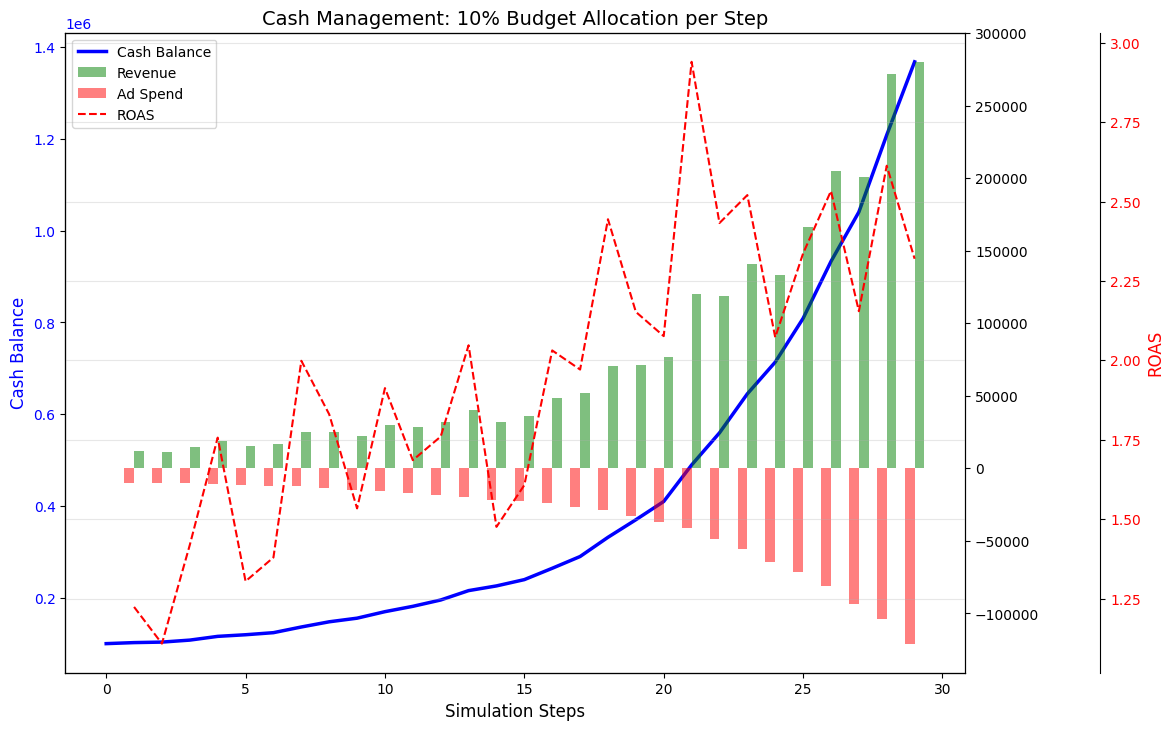

Cash management simulation plot saved to visualization_results/budget_strategy/cash_management_simulation.png


In [21]:
# 4. Visualize Budget Allocation Strategy
def visualize_budget_allocation_strategy(dataset, output_dir):
    """
    Create visualizations focused on the budget allocation strategy.
    """
    print(f"Generating budget allocation strategy visualization...")
    saved_plots = []

    # Create cash management simulation visualization
    plt.figure(figsize=(12, 8), dpi=100)

    # Implement budget allocation simulation with temporal dynamics
    initial_cash = 100000
    cash_levels = [initial_cash]
    revenues = [0]
    expenses = [0]
    roas_values = []
    steps = list(range(30))  # Simulate 30 steps

    np.random.seed(42)  # For reproducibility

    for step in range(1, 30):
        # Get previous cash level
        prev_cash = cash_levels[-1]

        # Implement 10% budget allocation constraint
        budget = prev_cash * 0.1

        # Simulate ROAS with temporal learning improvements
        step_factor = min(1.0, step / 20)
        base_roas = 1.0 + step_factor * 1.5
        roas = max(0.5, np.random.normal(base_roas, 0.3))
        roas_values.append(roas)

        # Calculate revenue with stochastic returns
        revenue = budget * roas
        revenues.append(revenue)
        expenses.append(budget)

        # Update cash position
        new_cash = prev_cash - budget + revenue
        cash_levels.append(new_cash)

    # Create multi-axis visualization
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Plot cash balance trajectory
    ax1.plot(steps, cash_levels, 'b-', linewidth=2.5, label='Cash Balance')
    ax1.set_xlabel('Simulation Steps', fontsize=12)
    ax1.set_ylabel('Cash Balance', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Implement revenue/expense visualization on secondary axis
    ax2 = ax1.twinx()

    # Plot revenue and expenses with differentiated representation
    bar_width = 0.35
    revenue_bars = ax2.bar([x + bar_width/2 for x in steps[1:]], revenues[1:],
                          bar_width, alpha=0.5, color='green', label='Revenue')
    expense_bars = ax2.bar([x - bar_width/2 for x in steps[1:]], [-e for e in expenses[1:]],
                          bar_width, alpha=0.5, color='red', label='Ad Spend')

    # Implement ROAS temporal trajectory visualization
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("axes", 1.15))  # Offset the right spine
    roas_line, = ax3.plot(steps[1:], roas_values, 'r--', linewidth=1.5, label='ROAS')
    ax3.set_ylabel('ROAS', fontsize=12, color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Construct integrated legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper left')

    # Implement explanatory annotation
    plt.annotate('10% Budget Allocation Policy\nManages Risk While Optimizing Returns',
                xy=(15, cash_levels[15]), xytext=(20, cash_levels[15] * 0.8),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8, alpha=0.7),
                fontsize=10, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.title('Cash Management: 10% Budget Allocation per Step', fontsize=14)
    plt.grid(True, alpha=0.3)

    # Apply dimensional constraints
    fig.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.85)

    # Save the plot
    cash_plot_path = os.path.join(output_dir, "cash_management_simulation.png")
    plt.savefig(cash_plot_path, dpi=100)
    plt.show()

    saved_plots.append(cash_plot_path)
    print(f"Cash management simulation plot saved to {cash_plot_path}")

    return saved_plots

# Run the function
budget_plots = visualize_budget_allocation_strategy(dataset, os.path.join(output_dir, "budget_strategy"))

Generating feature correlation matrix visualization...


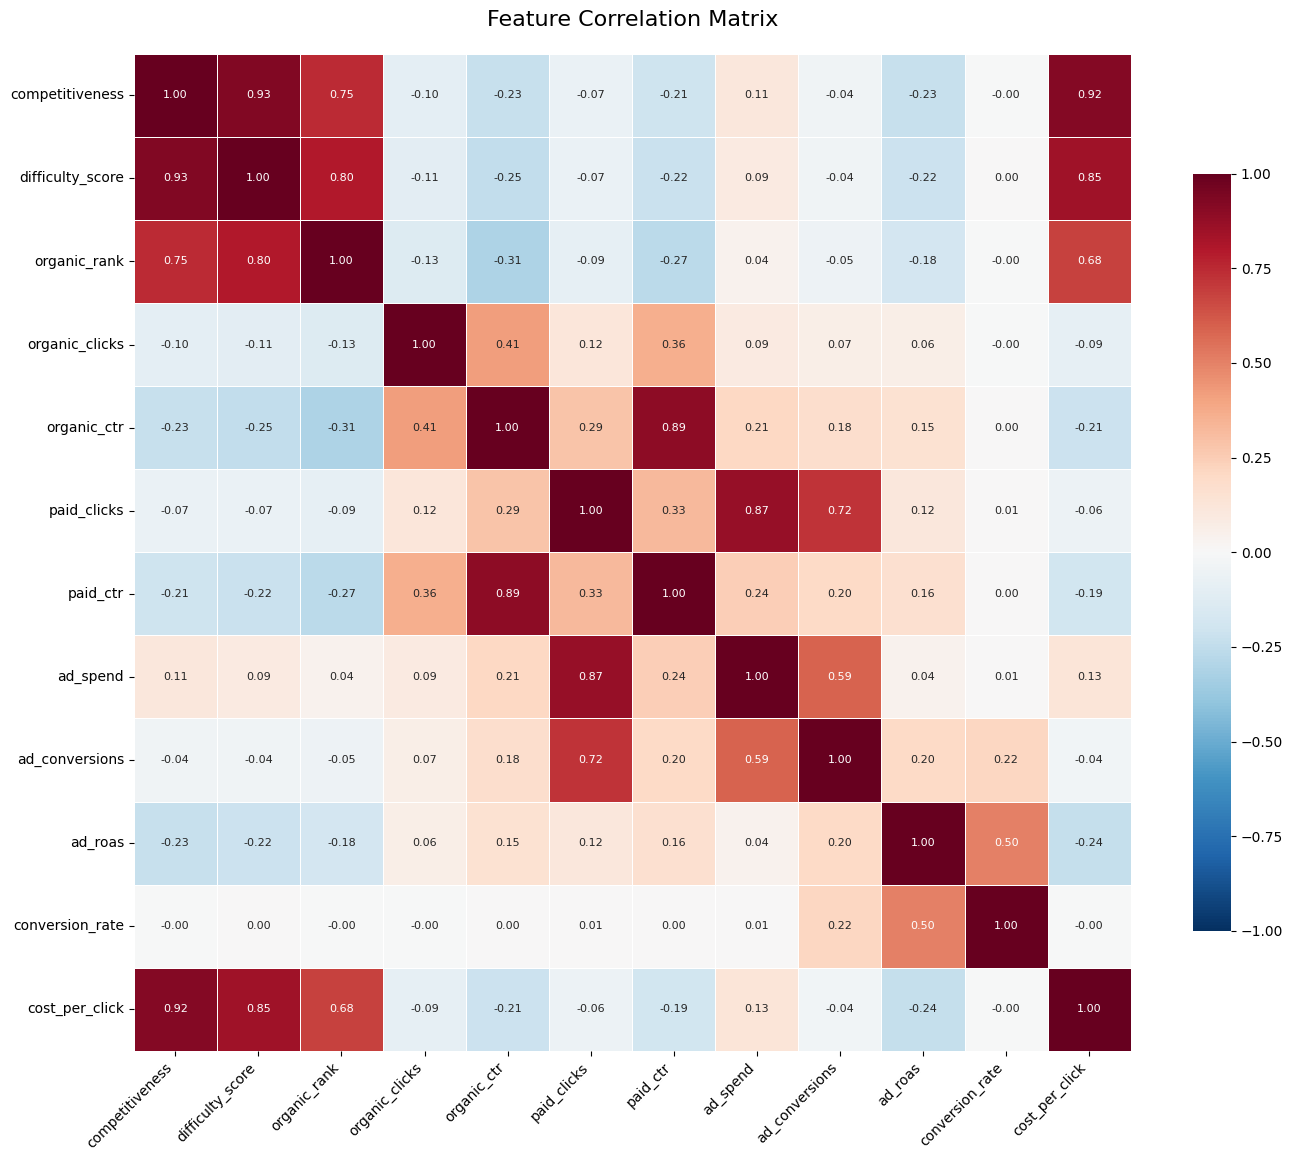

Feature correlation matrix saved to visualization_results/feature_analysis/feature_correlation_matrix.png


In [22]:
# 5. Visualize Feature Correlation Matrix
def visualize_feature_correlation_matrix(dataset, output_dir):
    """
    Create a correlation heatmap of the feature columns.
    """
    print(f"Generating feature correlation matrix visualization...")
    saved_plots = []

    # Calculate correlation matrix
    corr = dataset[feature_columns].corr()

    # Create figure with constrained dimensions
    plt.figure(figsize=(14, 12), dpi=100)

    # Create heatmap with custom colormap
    cmap = plt.cm.RdBu_r
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask, k=1)] = False  # Only show lower triangle

    # Plot the heatmap
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .7},
                annot=True, fmt=".2f", annot_kws={"size": 8})

    # Configure labels and title
    plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Tighten layout
    plt.tight_layout()

    # Save the plot
    corr_plot_path = os.path.join(output_dir, "feature_correlation_matrix.png")
    plt.savefig(corr_plot_path, dpi=100, bbox_inches="tight")
    plt.show()

    saved_plots.append(corr_plot_path)
    print(f"Feature correlation matrix saved to {corr_plot_path}")

    return saved_plots

# Run the function
feature_plots = visualize_feature_correlation_matrix(dataset, os.path.join(output_dir, "feature_analysis"))

Generating keyword PCA visualization for executive decision-making...


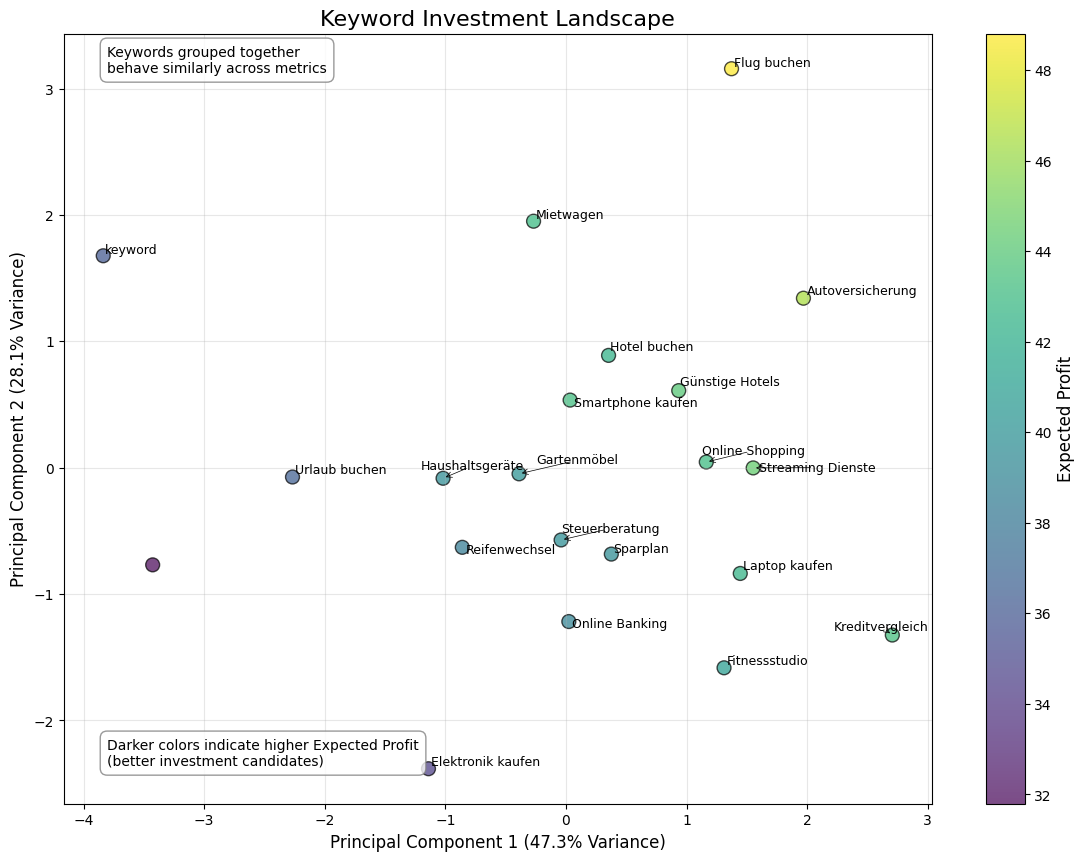

Keyword investment landscape saved to visualization_results/keyword_investment/keyword_investment_landscape.png


In [28]:
# 6. Visualize Keyword Clustering for Executive Decision Making - Part 1: PCA Plot
def visualize_keyword_pca(dataset, output_dir):
    """
    Create PCA visualization for keyword investment decisions
    """
    print(f"Generating keyword PCA visualization for executive decision-making...")
    saved_plots = []

    # Create a pivot table with keywords as rows and metrics as columns
    keyword_metrics = dataset.pivot_table(
        index='keyword',
        values=feature_columns,
        aggfunc='mean'  # Take the average if there are multiple entries per keyword
    ).reset_index()

    # Calculate additional metrics that executives care about
    if 'ad_roas' in keyword_metrics.columns and 'ad_spend' in keyword_metrics.columns:
        # Calculate expected profit
        keyword_metrics['expected_profit'] = (keyword_metrics['ad_roas'] - 1) * keyword_metrics['ad_spend']

    if 'conversion_rate' in keyword_metrics.columns and 'paid_ctr' in keyword_metrics.columns:
        # Calculate funnel efficiency (CTR * conversion rate)
        keyword_metrics['funnel_efficiency'] = keyword_metrics['paid_ctr'] * keyword_metrics['conversion_rate']

    # Keep only the most business-relevant metrics for clustering
    business_metrics = ['ad_roas', 'paid_ctr', 'conversion_rate', 'ad_spend']
    if 'expected_profit' in keyword_metrics:
        business_metrics.append('expected_profit')
    if 'funnel_efficiency' in keyword_metrics:
        business_metrics.append('funnel_efficiency')

    # Ensure all selected metrics exist in the dataset
    business_metrics = [m for m in business_metrics if m in keyword_metrics.columns]

    # Create a copy of the dataset with just the business metrics
    clustering_data = keyword_metrics[['keyword'] + business_metrics].copy()

    # Handle NaN values (replace with column means)
    for col in business_metrics:
        clustering_data[col] = clustering_data[col].fillna(clustering_data[col].mean())

    # Normalize data for PCA
    X = clustering_data[business_metrics].copy()
    for col in X.columns:
        X[col] = (X[col] - X[col].mean()) / X[col].std()

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame({
        'keyword': clustering_data['keyword'],
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1]
    })

    # Add the most important business metrics back for coloring points
    for metric in ['ad_roas', 'ad_spend', 'expected_profit', 'conversion_rate']:
        if metric in clustering_data.columns:
            pca_df[metric] = clustering_data[metric]

    # Determine the best metric to color by
    if 'expected_profit' in pca_df.columns:
        color_metric = 'expected_profit'
        color_title = 'Expected Profit'
    elif 'ad_roas' in pca_df.columns:
        color_metric = 'ad_roas'
        color_title = 'ROAS'
    else:
        color_metric = 'ad_spend'
        color_title = 'Ad Spend'

    # Create the PCA plot
    plt.figure(figsize=(14, 10))

    # Calculate explained variance for axis labels
    explained_var = pca.explained_variance_ratio_ * 100

    # Create scatter plot
    scatter = plt.scatter(
        pca_df['PC1'],
        pca_df['PC2'],
        c=pca_df[color_metric],
        cmap='viridis',
        s=100,  # Larger points for visibility
        alpha=0.7,
        edgecolors='k',
        linewidths=1
    )

    # Add a colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label(color_title, fontsize=12)

    # Add labels for easier identification (but avoid overlapping)
    # Only label a manageable number of points to avoid clutter
    MAX_LABELS = 20
    if len(pca_df) > MAX_LABELS:
        # If we have too many keywords, only label the top ones by the color metric
        top_indices = pca_df[color_metric].abs().nlargest(MAX_LABELS).index
        label_df = pca_df.loc[top_indices]
    else:
        label_df = pca_df

    texts = []
    for i, row in label_df.iterrows():
        texts.append(plt.text(row['PC1'], row['PC2'], row['keyword'], fontsize=9))

    # Try to adjust text positions to minimize overlap
    try:
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='->', color='black', lw=0.5, shrinkA=5),
            expand_points=(1.5, 1.5)
        )
    except Exception as e:
        print(f"Warning: Adjusting text labels had an issue: {str(e)}")
        print("Some labels may overlap, but the visualization is still valid.")

    # Add title and labels
    plt.title('Keyword Investment Landscape', fontsize=16)
    plt.xlabel(f'Principal Component 1 ({explained_var[0]:.1f}% Variance)', fontsize=12)
    plt.ylabel(f'Principal Component 2 ({explained_var[1]:.1f}% Variance)', fontsize=12)
    plt.grid(alpha=0.3)

    # Add explanatory annotations for executives
    plt.annotate(
        "Keywords grouped together\nbehave similarly across metrics",
        xy=(0.05, 0.95),
        xycoords='axes fraction',
        bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
        fontsize=10
    )

    # Add interpretation guide based on color metric
    if color_metric == 'expected_profit' or color_metric == 'ad_roas':
        plt.annotate(
            f"Darker colors indicate higher {color_title}\n(better investment candidates)",
            xy=(0.05, 0.05),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
            fontsize=10
        )
    else:
        plt.annotate(
            f"Darker colors indicate higher {color_title}",
            xy=(0.05, 0.05),
            xycoords='axes fraction',
            bbox=dict(boxstyle="round,pad=0.5", fc="white", ec="gray", alpha=0.8),
            fontsize=10
        )

    # Save the visualization
    pca_path = os.path.join(output_dir, "keyword_investment_landscape.png")
    plt.savefig(pca_path, dpi=100, bbox_inches="tight")
    plt.show()

    saved_plots.append(pca_path)
    print(f"Keyword investment landscape saved to {pca_path}")

    return saved_plots, clustering_data

# Run the function
pca_plots, clustering_data = visualize_keyword_pca(dataset, os.path.join(output_dir, "keyword_investment"))

Generating keyword quadrant analysis for executive decision-making...


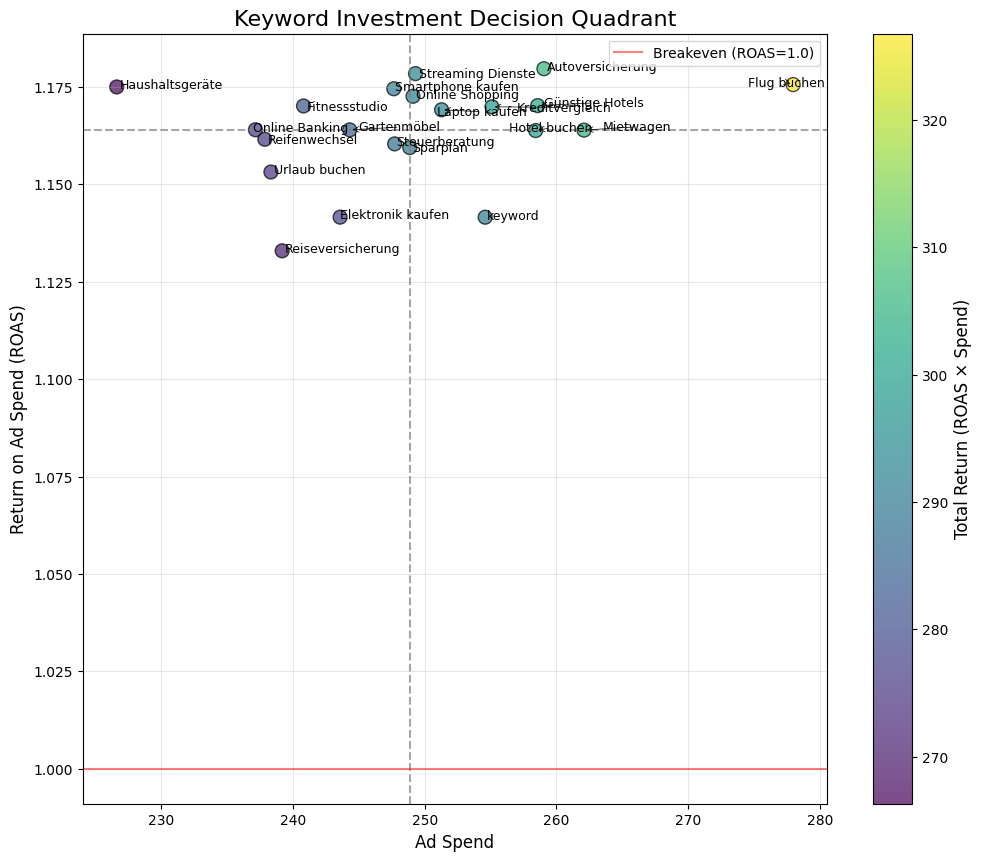

Keyword investment quadrant saved to visualization_results/keyword_investment/keyword_investment_quadrant.png


In [29]:
# 6. Visualize Keyword Clustering for Executive Decision Making - Part 2: Quadrant Analysis
def visualize_keyword_quadrant(clustering_data, output_dir):
    """
    Create quadrant analysis for keyword investment decisions
    """
    print(f"Generating keyword quadrant analysis for executive decision-making...")
    saved_plots = []

    # Only create quadrant analysis if we have the right metrics
    if 'ad_roas' in clustering_data.columns and 'ad_spend' in clustering_data.columns:
        # Create a quadrant analysis plot (ROAS vs Spend)
        plt.figure(figsize=(12, 10))

        # Determine breakpoints for quadrants (using median or 1.0 for ROAS)
        roas_threshold = max(clustering_data['ad_roas'].median(), 1.0)  # At least breakeven
        spend_threshold = clustering_data['ad_spend'].median()

        # Create the scatter plot
        scatter = plt.scatter(
            clustering_data['ad_spend'],
            clustering_data['ad_roas'],
            c=clustering_data['ad_roas'] * clustering_data['ad_spend'],  # Color by total return
            cmap='viridis',
            s=100,
            alpha=0.7,
            edgecolors='k',
            linewidths=1
        )

        # Add reference lines for quadrants
        plt.axvline(x=spend_threshold, color='gray', linestyle='--', alpha=0.7)
        plt.axhline(y=roas_threshold, color='gray', linestyle='--', alpha=0.7)

        # Add colorbar
        cbar = plt.colorbar(scatter)
        cbar.set_label('Total Return (ROAS × Spend)', fontsize=12)

        # Add labels for easier identification
        texts = []
        for i, row in clustering_data.iterrows():
            texts.append(plt.text(row['ad_spend'], row['ad_roas'], row['keyword'], fontsize=9))

        # Try to adjust text positions to minimize overlap
        try:
            adjust_text(
                texts,
                arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
                expand_points=(1.5, 1.5)
            )
        except Exception as e:
            print(f"Warning: Could not adjust text labels: {str(e)}")
            print("Some labels may overlap.")

        # Add quadrant labels/explanations
        plt.annotate(
            "HIGH VALUE\nHigh ROAS, Low Spend\n→ Increase Budget",
            xy=(spend_threshold * 0.1, roas_threshold * 1.1),
            xycoords='data',
            bbox=dict(boxstyle="round,pad=0.5", fc="#90EE90", ec="green", alpha=0.7),
            fontsize=10
        )

        plt.annotate(
            "STAR PERFORMERS\nHigh ROAS, High Spend\n→ Maintain/Optimize",
            xy=(spend_threshold * 1.1, roas_threshold * 1.1),
            xycoords='data',
            bbox=dict(boxstyle="round,pad=0.5", fc="#ADD8E6", ec="blue", alpha=0.7),
            fontsize=10
        )

        plt.annotate(
            "POOR PERFORMERS\nLow ROAS, Low Spend\n→ Test or Cut",
            xy=(spend_threshold * 0.1, roas_threshold * 0.5),
            xycoords='data',
            bbox=dict(boxstyle="round,pad=0.5", fc="#FFCCCB", ec="red", alpha=0.7),
            fontsize=10
        )

        plt.annotate(
            "REVIEW & OPTIMIZE\nLow ROAS, High Spend\n→ Reduce or Improve",
            xy=(spend_threshold * 1.1, roas_threshold * 0.5),
            xycoords='data',
            bbox=dict(boxstyle="round,pad=0.5", fc="#FFD700", ec="orange", alpha=0.7),
            fontsize=10
        )

        # Add title and labels
        plt.title('Keyword Investment Decision Quadrant', fontsize=16)
        plt.xlabel('Ad Spend', fontsize=12)
        plt.ylabel('Return on Ad Spend (ROAS)', fontsize=12)
        plt.grid(alpha=0.3)

        # Add breakeven line
        plt.axhline(y=1.0, color='red', linestyle='-', alpha=0.5, label='Breakeven (ROAS=1.0)')
        plt.legend()

        # Save the visualization
        quadrant_path = os.path.join(output_dir, "keyword_investment_quadrant.png")
        plt.savefig(quadrant_path, dpi=100, bbox_inches="tight")
        plt.show()

        saved_plots.append(quadrant_path)
        print(f"Keyword investment quadrant saved to {quadrant_path}")
    else:
        print("Required metrics for quadrant analysis not found in dataset (ad_roas, ad_spend)")

    return saved_plots

# Run the function
quadrant_plots = visualize_keyword_quadrant(clustering_data, os.path.join(output_dir, "keyword_investment"))

In [25]:
# 7: Interactive clustering visualization using Plotly
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import IFrame

def create_interactive_keyword_clustering(dataset, output_dir):
    """
    Create an interactive visualization of keyword clustering using Plotly.
    """
    print("Generating interactive keyword clustering visualization...")

    # Create a pivot table with keywords as rows and metrics as columns
    keyword_metrics = dataset.pivot_table(
        index='keyword',
        values=feature_columns,
        aggfunc='mean'
    ).reset_index()

    # Calculate additional metrics
    if 'ad_roas' in keyword_metrics.columns and 'ad_spend' in keyword_metrics.columns:
        keyword_metrics['expected_profit'] = (keyword_metrics['ad_roas'] - 1) * keyword_metrics['ad_spend']

    if 'conversion_rate' in keyword_metrics.columns and 'paid_ctr' in keyword_metrics.columns:
        keyword_metrics['funnel_efficiency'] = keyword_metrics['paid_ctr'] * keyword_metrics['conversion_rate']

    # Business metrics
    business_metrics = ['ad_roas', 'paid_ctr', 'conversion_rate', 'ad_spend']
    if 'expected_profit' in keyword_metrics:
        business_metrics.append('expected_profit')
    if 'funnel_efficiency' in keyword_metrics:
        business_metrics.append('funnel_efficiency')

    # Ensure metrics exist
    business_metrics = [m for m in business_metrics if m in keyword_metrics.columns]

    # Normalize data for PCA
    X = keyword_metrics[business_metrics].copy()
    for col in X.columns:
        X[col] = (X[col] - X[col].mean()) / X[col].std()

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Create DataFrame with PCA results
    pca_df = pd.DataFrame({
        'keyword': keyword_metrics['keyword'],
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1]
    })

    # Add metrics for coloring and sizing
    for metric in business_metrics:
        pca_df[metric] = keyword_metrics[metric]

    # Color metric
    if 'expected_profit' in pca_df.columns:
        color_metric = 'expected_profit'
        color_title = 'Expected Profit'
    elif 'ad_roas' in pca_df.columns:
        color_metric = 'ad_roas'
        color_title = 'ROAS'
    else:
        color_metric = 'ad_spend'
        color_title = 'Ad Spend'

    # Size metric
    size_metric = 'ad_spend' if 'ad_spend' in pca_df.columns else 'paid_clicks'

    # Create interactive plot
    fig = px.scatter(
        pca_df,
        x='PC1',
        y='PC2',
        color=color_metric,
        size=size_metric,
        hover_name='keyword',
        hover_data=business_metrics,
        labels={
            'PC1': f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.1%} variance)',
            'PC2': f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.1%} variance)',
            color_metric: color_title,
            size_metric: size_metric.replace('_', ' ').title()
        },
        title='Interactive Keyword Investment Landscape',
        color_continuous_scale='viridis',
        size_max=40
    )

    # Update layout
    fig.update_layout(
        template='plotly_white',
        title_font_size=20,
        title_x=0.5,
        legend_title_font_size=14,
        legend_font_size=12,
        width=1000,
        height=700
    )

    # Add annotations
    fig.add_annotation(
        x=0.05,
        y=0.95,
        xref='paper',
        yref='paper',
        text='Keywords grouped together<br>behave similarly across metrics',
        showarrow=False,
        font=dict(size=14),
        bgcolor='white',
        bordercolor='gray',
        borderwidth=1,
        borderpad=4,
        opacity=0.8
    )

    # Save as HTML
    html_path = os.path.join(output_dir, 'interactive_keyword_landscape.html')
    fig.write_html(html_path)
    print(f"Interactive visualization saved to {html_path}")

    # Display in notebook
    return fig

# Run the function
interactive_fig = create_interactive_keyword_clustering(dataset, output_dir)
interactive_fig.show()

Generating interactive keyword clustering visualization...


/usr/local/lib/python3.11/dist-packages/_plotly_utils/basevalidators.py:2596: DeprecationWarning:

*scattermapbox* is deprecated! Use *scattermap* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Interactive visualization saved to visualization_results/interactive_keyword_landscape.html
